# Ames House Price Prediction Model

## Import modules

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns

from sklearn import preprocessing

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Preview the Train and Test datas 

In [7]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [9]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0         706          Unf           0        150          856    GasA        Ex          Y   
1         978          Unf           0        284         1262    GasA        Ex          Y   
2         486          Unf           0        434          920    GasA        Ex          Y   
3         216          Unf           0        540          756    GasA        Gd          Y   
4         655          Unf           0        490         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710             1             0         2   
1      SBrkr      1262         0             0       1262             0             1         2   
2      SBrkr       920       866             0       1786             1             0         2   
3      SBrkr       961       756             0       1717             1             0         1   
4      SBrkr      1145      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [11]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg         Lvl    AllPub   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1         Lvl    AllPub   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1         Lvl    AllPub   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1         Lvl    AllPub   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1         HLS    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5   
1    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6   
2    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5   
3    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6   
4    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            6       1961          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2            5       1997          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4            5       1992          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0         0.0        TA        TA     CBlock       TA       TA           No          Rec   
1       108.0        TA        TA     CBlock       TA       TA           No          ALQ   
2         0.0        TA        TA      PConc       Gd       TA           No          GLQ   
3        20.0        TA        TA      PConc       TA       TA           No          GLQ   
4         0.0        Gd        TA      PConc       Gd       TA           No          ALQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0       468.0          LwQ       144.0      270.0        882.0    GasA        TA          Y   
1       923.0          Unf         0.0      406.0       1329.0    GasA        TA          Y   
2       791.0          Unf         0.0      137.0        928.0    GasA        Gd          Y   
3       602.0          Unf         0.0      324.0        926.0    GasA        Ex          Y   
4       263.0          Unf         0.0     1017.0       1280.0    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       896         0             0        896           0.0           0.0         1   
1      SBrkr      1329         0             0       1329           0.0           0.0         1   
2      SBrkr       928       701             0       1629           0.0           0.0         2   
3      SBrkr       926       678             0       1604           0.0           0.0         2   
4      SBrkr      1280         0             0       1280           0.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         0             2             1          TA             5        Typ           0   
1         1             3             1          Gd             6        Typ           0   
2         1             3             1          TA             6        Typ           1   
3         1             3             1          Gd             7        Typ           1   
4         0             2             1          Gd             5        Typ           0   

  

In [13]:
df = pd.concat([train, test], ignore_index=False)

In [15]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y   
1       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y   
2       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y   
3       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y   
4       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710           1.0           0.0         2   
1      SBrkr      1262         0             0       1262           0.0           1.0         2   
2      SBrkr       920       866             0       1786           1.0           0.0         2   
3      SBrkr       961       756             0       1717           1.0           0.0         1   
4      SBrkr      1145      1053             0       2198           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [17]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072     5.564577   
std     842.787043    42.517628    23.344905    7886.996359     1.409947     1.113131   
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000     5.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000     6.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000  2918.000000  2918.000000   
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248   560.772104  1051.777587   
std      30.291442     20.894344   179.334253   455.610826   169.205611   439.543659   440.766258   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000   220.000000   793.000000   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000   467.000000   989.500000   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000   805.500000  1302.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  2919.000000  2919.000000   2919.000000  2919.000000   2917.000000   2917.000000   
mean   1159.581706   336.483727      4.694416  1500.759849      0.429894      0.061364   
std     392.362079   428.701456     46.396825   506.051045      0.524736      0.245687   
min     334.000000     0.000000      0.000000   334.000000      0.000000      0.000000   
25%     876.000000     0.000000      0.000000  1126.000000      0.000000      0.000000   
50%    1082.000000     0.000000      0.000000  1444.000000      0.000000      0.000000   
75%    1387.500000   704.000000      0.000000  1743.500000      1.000000      0.000000   
max    5095.000000  2065.000000   1064.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      1.568003     0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.552969     0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000     0.000000      0.000000      0.000000      2.000000     0.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000     0.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000     1.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000     1.000000   
max       4.000000     2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000    2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811      23.098321   
std      25.574285     0.761624   215.394815   126.526589    67.575493      64.244246   
min    1895.000000     0.000000     0.000000     0.000000     0.000000       0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000       0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000       0.000000   
75%    2002.000000     2.000000   576.000000   168.000000  

## Data Understanding

Look through the data to see if there are any missing values or duplicate rows and handle them

In [19]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [21]:
#remove the id column from df and store in id variable
id_var = df['Id']
df = df.drop('Id', axis=1)

print(f'{id_var.head()}\n{df.head()}')

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner      

Count and Percent value of missing features in DF

In [24]:
count = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
null_values = pd.concat([count, percent], axis=1, keys=['Count', 'Percent'])
null_values.head(20)

Count   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
MasVnrType     1766  0.605002
SalePrice      1459  0.499829
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageCond      159  0.054471
GarageYrBlt     159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrArea       23  0.007879
MSZoning          4  0.001370

In [26]:
# duplicated values?
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 2919, dtype: bool>

In [28]:
col_val_count = {}
for col in df.columns:
    col_val_count[col] = df[col].value_counts()

for col, counts in col_val_count.items():
    print(f"Column: {col}")
    print(counts)
    print("\n")
    print("**" * 40 + '\n')

Column: MSSubClass
MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64


********************************************************************************

Column: MSZoning
MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


********************************************************************************

Column: LotFrontage
LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
90.0      46
78.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
79.0      28
100.0     28
82.0      28
52.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
55.0      24
53.0      24
43.0      23
88.0      22
67.0      22
69.0

#### Feature Classification

1. **Categorical Features:** Columns that represent distinct categories or groups.
2. **Numerical Features:** Columns that represent numbers. These are further divided into continuous and discrete:
    * **Discrete Features:** Numerical values that are countable and finite.
    * **Continuous Features:** Numerical values that can take any value.
3. **Temporal Features:** Features that represent time.

In [30]:
# Numerical Features
num_features = df.select_dtypes(include=[np.number])

#Categorical Features 
categorical_feats = df.select_dtypes(include = [object])

#Total Features
tot_feats = list(num_features.columns) + list(categorical_feats.columns)

In [32]:
#Descrete Features
discrete_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                     'Fireplaces', 'GarageCars']


In [34]:
# Add discrete features to categorical
categorical_features = pd.concat([categorical_feats, df[discrete_features]], axis=1)

# Step 4: Continuous Features
continuous_features = num_features.drop(columns=discrete_features)


In [36]:
date_yr = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
date_mths = ['MoSold']
for col in date_yr:
    df[col] = pd.to_datetime(df[col], format='%Y').dt.year

for col in date_mths:
    df[col] = pd.to_datetime(df[col], format='%m').dt.month

In [38]:
#Temporal Features
temporal_features = df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']]

In [40]:
# Step 4: Numerical Features we'll be using
numerical_features = continuous_features.drop(columns=temporal_features)


In [42]:
print(f'Numerical Features: {len(numerical_features.columns)}\n'
      f'Categorical Features: {len(categorical_features.columns)}\n'
      f'Temporal Features: {len(temporal_features.columns)}\n'
      f'Total Features: {len(tot_feats)}')

Numerical Features: 20
Categorical Features: 55
Temporal Features: 5
Total Features: 80


In [44]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2433 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   MasVnrArea     2896 non-null   float64
 3   BsmtFinSF1     2918 non-null   float64
 4   BsmtFinSF2     2918 non-null   float64
 5   BsmtUnfSF      2918 non-null   float64
 6   TotalBsmtSF    2918 non-null   float64
 7   1stFlrSF       2919 non-null   int64  
 8   2ndFlrSF       2919 non-null   int64  
 9   LowQualFinSF   2919 non-null   int64  
 10  GrLivArea      2919 non-null   int64  
 11  GarageArea     2918 non-null   float64
 12  WoodDeckSF     2919 non-null   int64  
 13  OpenPorchSF    2919 non-null   int64  
 14  EnclosedPorch  2919 non-null   int64  
 15  3SsnPorch      2919 non-null   int64  
 16  ScreenPorch    2919 non-null   int64  
 17  PoolArea       2919 non-null   int64  
 18  MiscVal      

In [46]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2915 non-null   object 
 1   Street         2919 non-null   object 
 2   Alley          198 non-null    object 
 3   LotShape       2919 non-null   object 
 4   LandContour    2919 non-null   object 
 5   Utilities      2917 non-null   object 
 6   LotConfig      2919 non-null   object 
 7   LandSlope      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  Condition2     2919 non-null   object 
 11  BldgType       2919 non-null   object 
 12  HouseStyle     2919 non-null   object 
 13  RoofStyle      2919 non-null   object 
 14  RoofMatl       2919 non-null   object 
 15  Exterior1st    2918 non-null   object 
 16  Exterior2nd    2918 non-null   object 
 17  MasVnrType     1153 non-null   object 
 18  ExterQual    

In [48]:
categorical_features = categorical_features.apply(lambda x: x.astype('category'))

In [50]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       2915 non-null   category
 1   Street         2919 non-null   category
 2   Alley          198 non-null    category
 3   LotShape       2919 non-null   category
 4   LandContour    2919 non-null   category
 5   Utilities      2917 non-null   category
 6   LotConfig      2919 non-null   category
 7   LandSlope      2919 non-null   category
 8   Neighborhood   2919 non-null   category
 9   Condition1     2919 non-null   category
 10  Condition2     2919 non-null   category
 11  BldgType       2919 non-null   category
 12  HouseStyle     2919 non-null   category
 13  RoofStyle      2919 non-null   category
 14  RoofMatl       2919 non-null   category
 15  Exterior1st    2918 non-null   category
 16  Exterior2nd    2918 non-null   category
 17  MasVnrType     1153 non-null   categor

In [52]:
categorical_features.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      2915   2919   198     2919        2919      2917      2919      2919         2919   
unique        5      2     2        4           4         2         5         3           25   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq       2265   2907   120     1859        2622      2916      2133      2778          443   

       Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd  \
count        2919       2919     2919       2919      2919     2919        2918        2918   
unique          9          8        5          8         6        8          15          16   
top          Norm       Norm     1Fam     1Story     Gable  CompShg     VinylSd     VinylSd   
freq         2511       2889     2425       1471      2310     2876        1025        1014   

       MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count        1153      2919      2919       2919     2838     2837         2837         2840   
unique          3         4         5          6        4        4            4            6   
top       BrkFace        TA        TA      PConc       TA       TA           No          Unf   
freq          879      1798      2538       1308     1283     2606         1904          851   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
count          2839    2919      2919       2919       2918        2918       2917        1499   
unique            6       6         5          2          5           4          7           5   
top             Unf    GasA        Ex          Y      SBrkr          TA        Typ          Gd   
freq           2493    2874      1493       2723       2671        1492       2717         744   

       GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
count        2762         2760       2760       2760       2919     10    571         105   
unique          6            3          5          5          3      3      4           4   
top        Attchd          Unf         TA         TA          Y     Ex  MnPrv        Shed   
freq         1723         1230       2604       2654       2641      4    329          95   

       SaleType SaleCondition  MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  \
count      2918          2919        2919         2919         2919        2917.0        2917.0   
unique        9             6          16           10            9           4.0           3.0   
top          WD        Normal          20            5            5           0.0           0.0   
freq       2525          2402        1079          825         1645        1705.0        2742.0   

        FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  
count       2919      2919          2919          2919          2919        2919      2918.0  
unique         5         3             8             4            14           5         6.0  
top            2         0             3             1             6           0         2.0  
freq        1530      1834          1596          2785           844        1420      1594.0

### Exploratory Data Analysis 

**Numerical Features**

In [54]:
list(numerical_features.columns.values)

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [56]:
numerical_list = list(numerical_features)
num_exclude = ['SalePrice']
num_list = [c for c in numerical_list if c not in num_exclude]

In [58]:
num_list

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

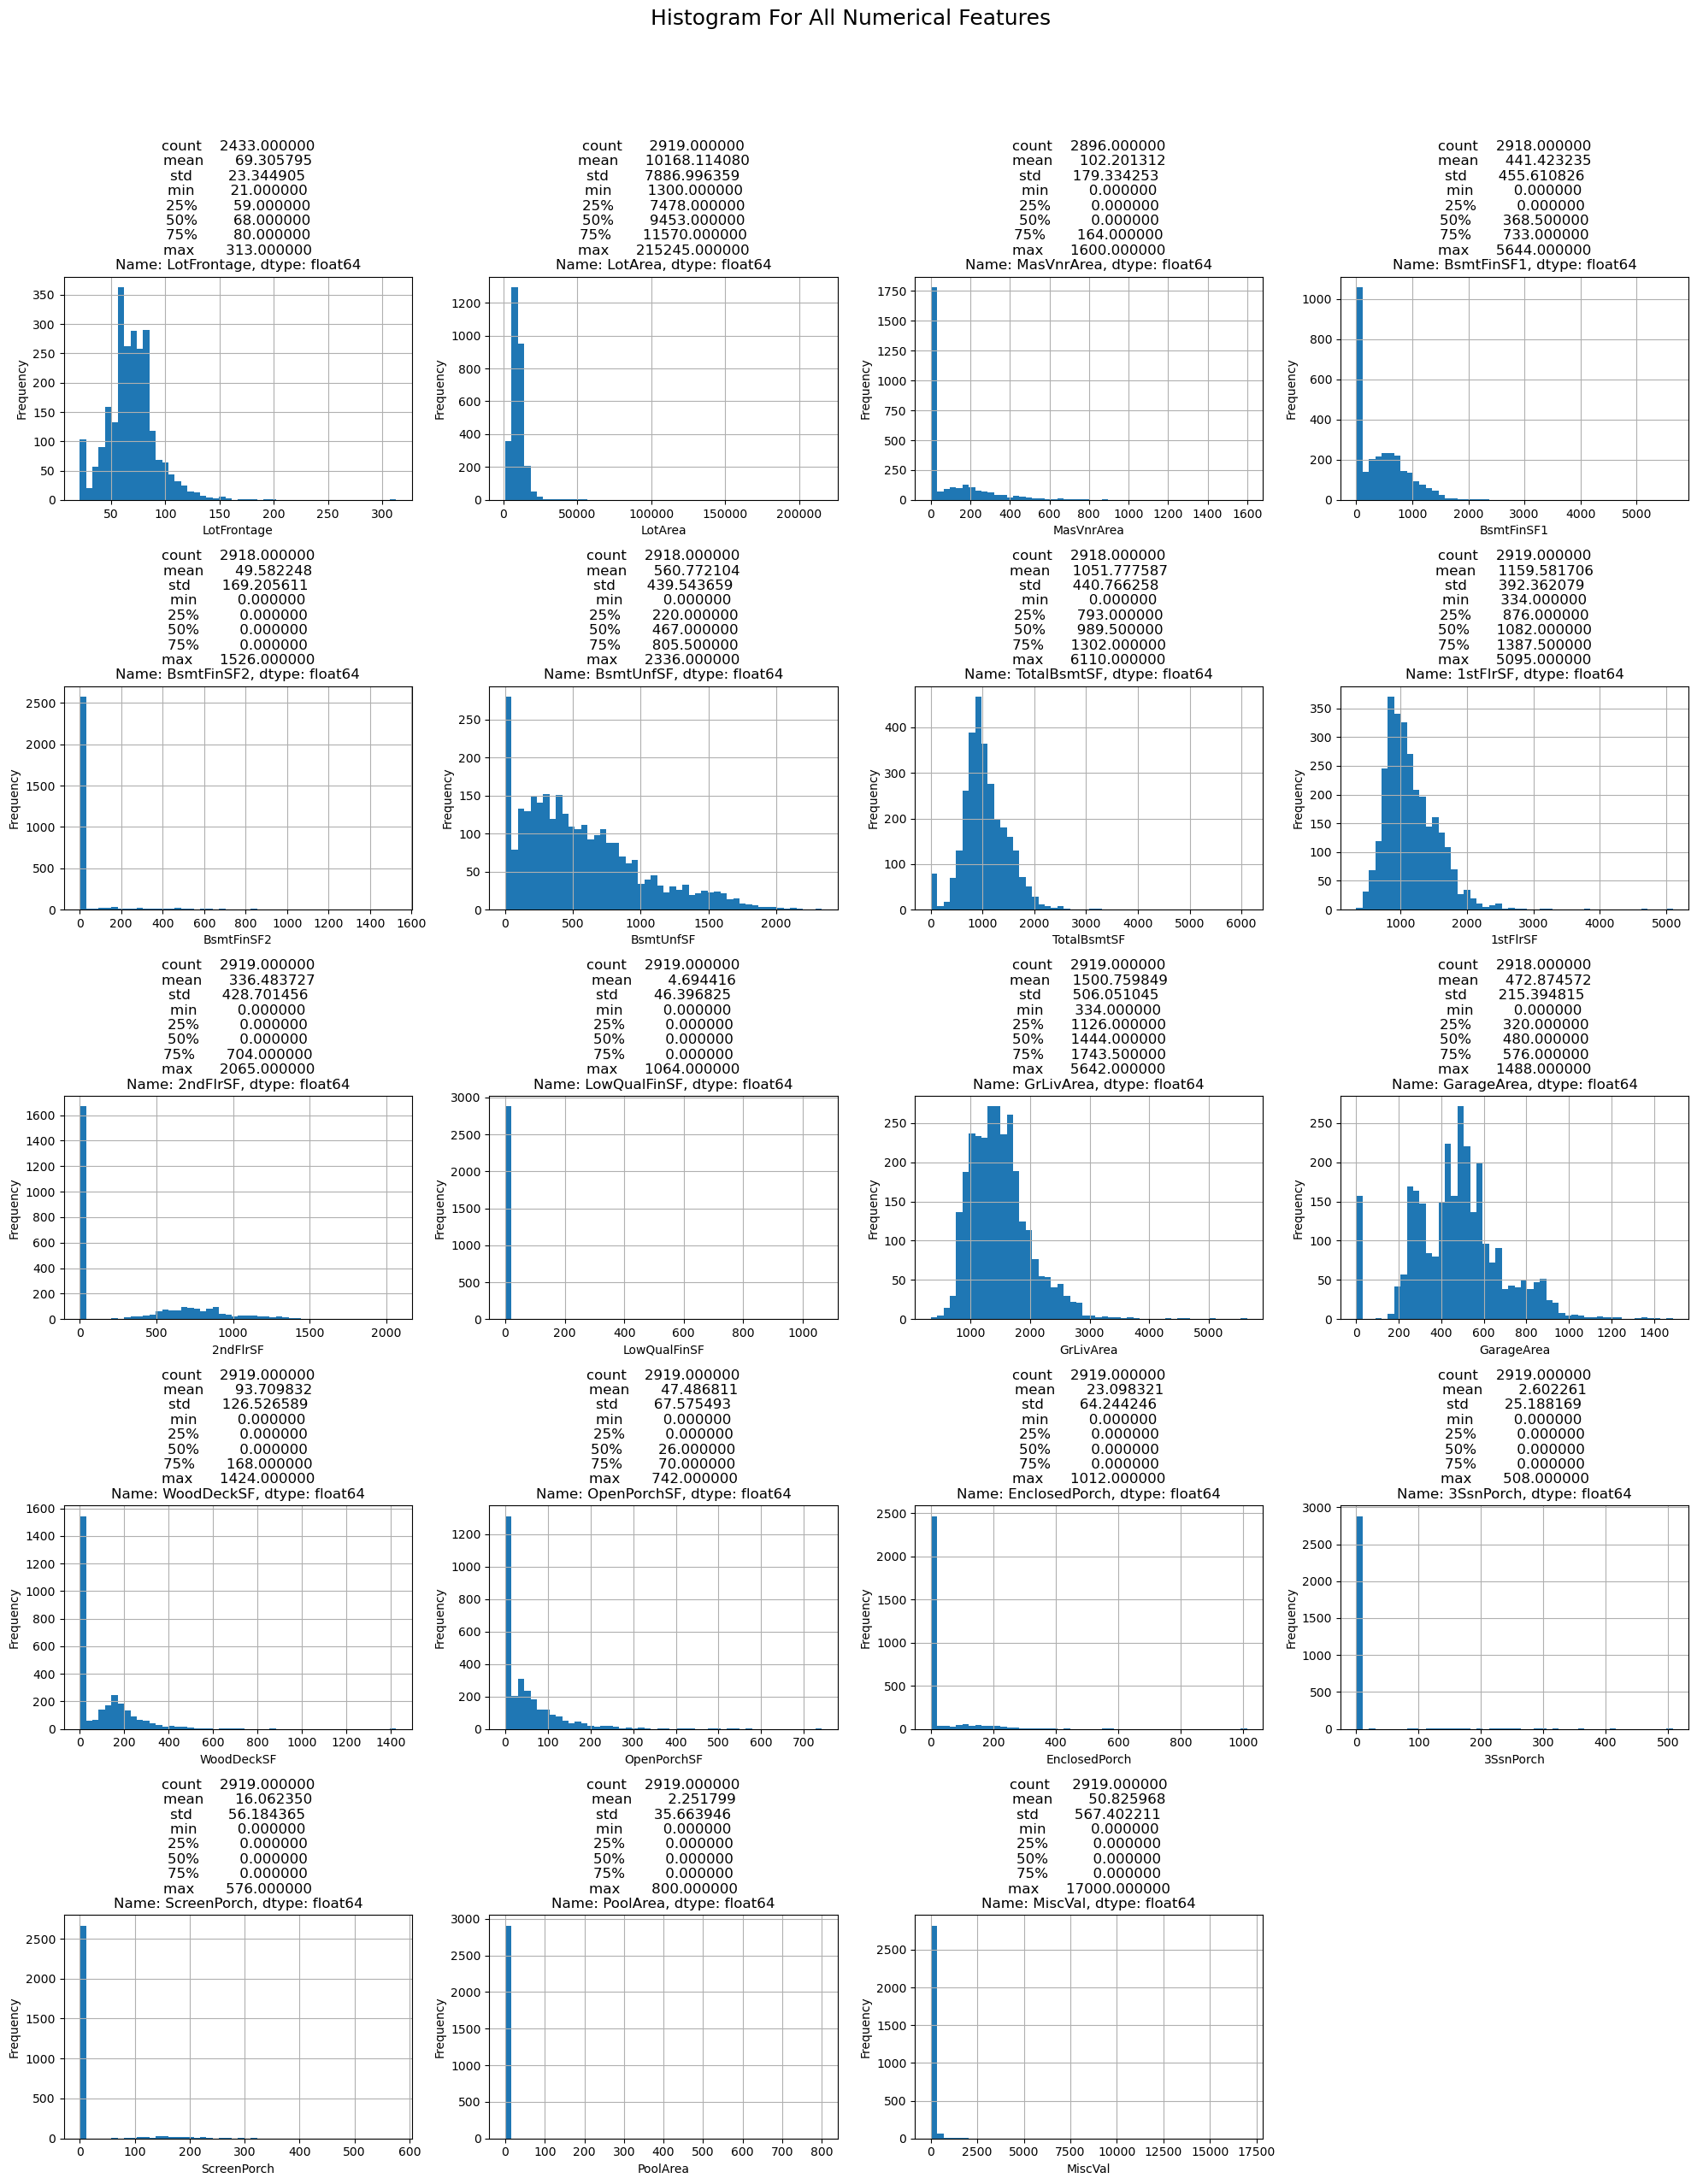

In [60]:
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()
fig.suptitle("Histogram For All Numerical Features", y=1.02, fontsize=18)
for i, col in enumerate(num_list):
    df[col].hist(bins=50, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title(f'{df[col].describe().T}', fontsize=12)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

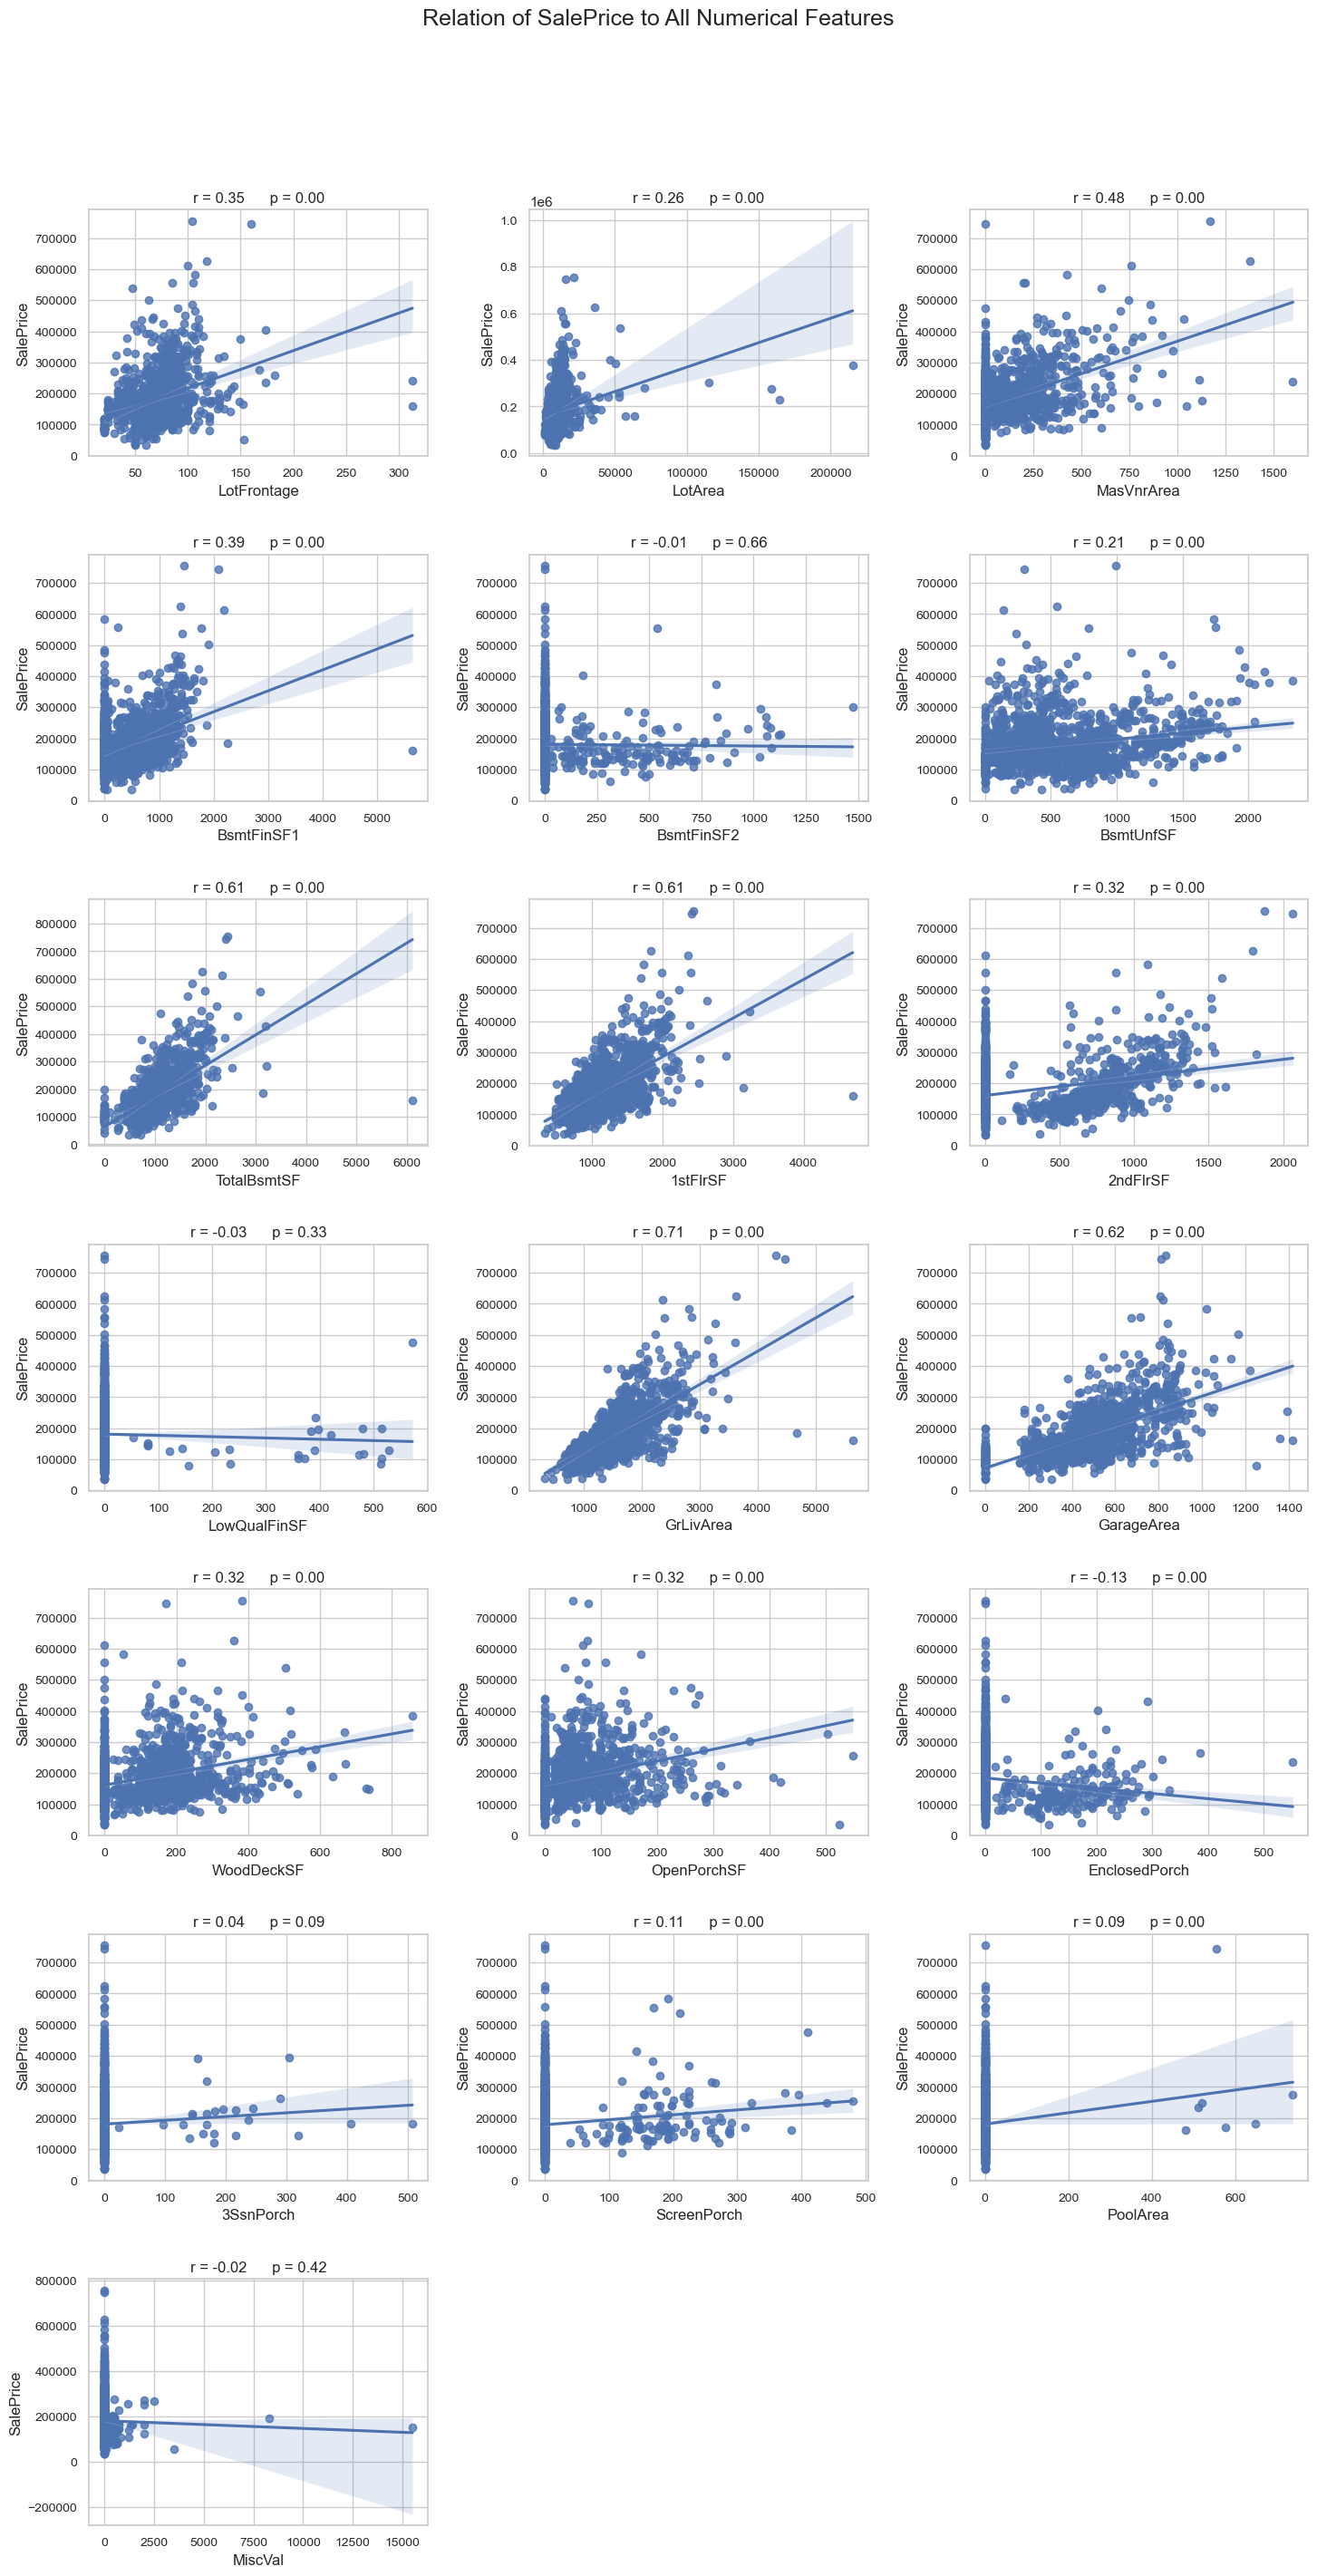

In [61]:
import scipy.stats as stats

sns.set(style="whitegrid", rc={"axes.titlesize": 10, "axes.labelsize": 10})
num_plots = len(num_list)
num_cols = 3  # 3 columns
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axs = axs.ravel()

for i, col in enumerate(num_list):
    filtered_df = df[[col, 'SalePrice']].replace([np.inf, -np.inf], np.nan).dropna()
    sns.regplot(x=filtered_df[col], y=filtered_df['SalePrice'], ax=axs[i])
    stp = stats.pearsonr(filtered_df[col], filtered_df['SalePrice'])
    str_title = f"r = {stp[0]:.2f}      p = {stp[1]:.2f}"
    axs[i].set_title(str_title, fontsize=12)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('SalePrice', fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=10)

# Remove any unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Relation of SalePrice to All Numerical Features', fontsize=18, y=1.02)  
plt.tight_layout(pad=2.0, rect=[0, 0, 1, 0.98])
plt.subplots_adjust(hspace=0.4, wspace=0.3)    
plt.show()   

**Categorical Features**

In [64]:
list(categorical_features.columns.values)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [66]:
for cat in categorical_features.columns:
    print(df[cat].value_counts())
    print('\n')

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


Street
Pave    2907
Grvl      12
Name: count, dtype: int64


Alley
Grvl    120
Pave     78
Name: count, dtype: int64


LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64


LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64


Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64


LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64


LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64


Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blm

ValueError: cannot reindex on an axis with duplicate labels

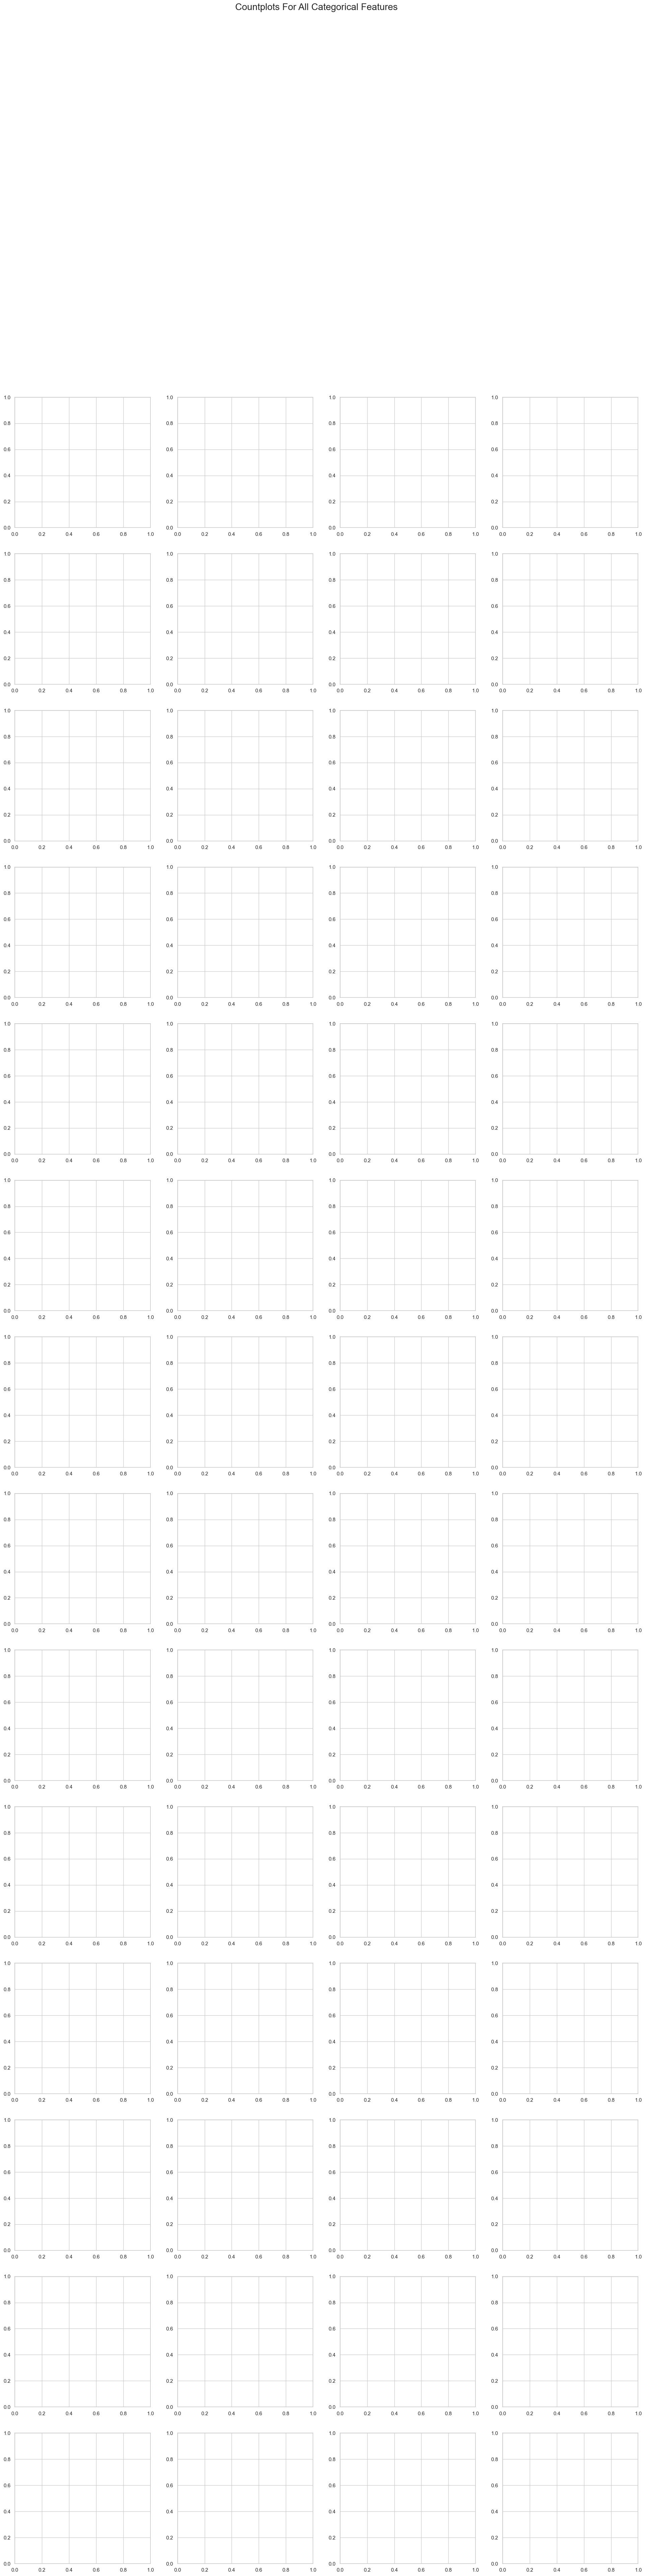

In [70]:
categorical_features.columns = [f"{col.strip()}_{i}" if categorical_features.columns.tolist().count(col.strip()) > 1 else col.strip() 
                                for i, col in enumerate(categorical_features.columns)]

num_rows = (len(categorical_features.columns) + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(24, 6 * num_rows))
axes = axes.ravel()
fig.suptitle("Countplots For All Categorical Features", fontsize=20, y=1.02)

for i, col in enumerate(categorical_features.columns):   
    ax = axes[i]
    sns.countplot(x=col, data=categorical_features, ax=ax, palette='viridis')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    
    vc = categorical_features[col].value_counts()
    if not vc.empty:
        values = vc.index[0]
        counts = vc.values[0]
        ax.set_title(f'Countplot for {col}\n'
                     f"Most Common Value: {values} ({counts} times, {counts / len(categorical_features) * 100:,.2f}%)", 
                     fontsize=14, color='blue')
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

for i in range(len(categorical_features.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [ ]:
fig, axes = plt.subplots(11, 4, figsize=(20, 50))
axes = axes.ravel()
fig.suptitle("SalePrice vs Categorical Features", y=1)

for i, col in enumerate(categorical_features.columns):   
    vc = df.groupby(col)['SalePrice'].median().reset_index()
    
    # Most common value and corresponding mean SalePrice
    mcv = df[col].value_counts().idxmax()  
    mcv_count = df[col].value_counts().max()
    mcv_percent = (mcv_count / len(df)) * 100
 
    ax = axes[i]
    sns.barplot(x=col, data=df, ax=ax, ci=None)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Median SalePrice', fontsize=10)
    
    ax.set_title(f'Median SalePrice for {col}\n'
                 "\n"
                 f"MCV is {mcv} ({mcv_count} times or {mcv_percent:,.2f}%)\n"
                 , fontsize=12, color = 'red')
    
    ax.tick_params(axis='x', rotation=45)

if len(categorical_features.columns) < 44:
    for i in range(len(categorical_features.columns), 44):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Neighbourhood Counts')

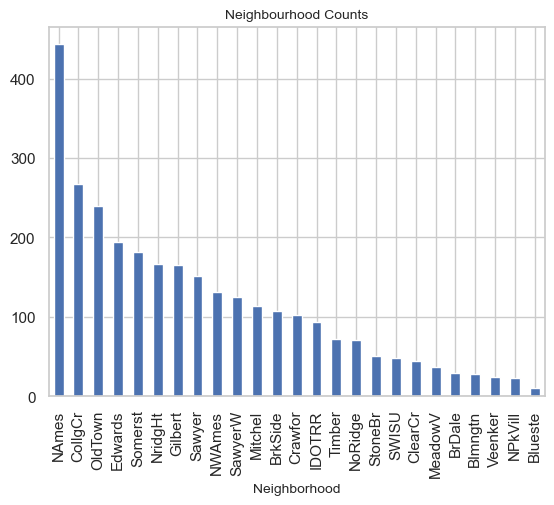

In [72]:
df['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Neighbourhood Counts')

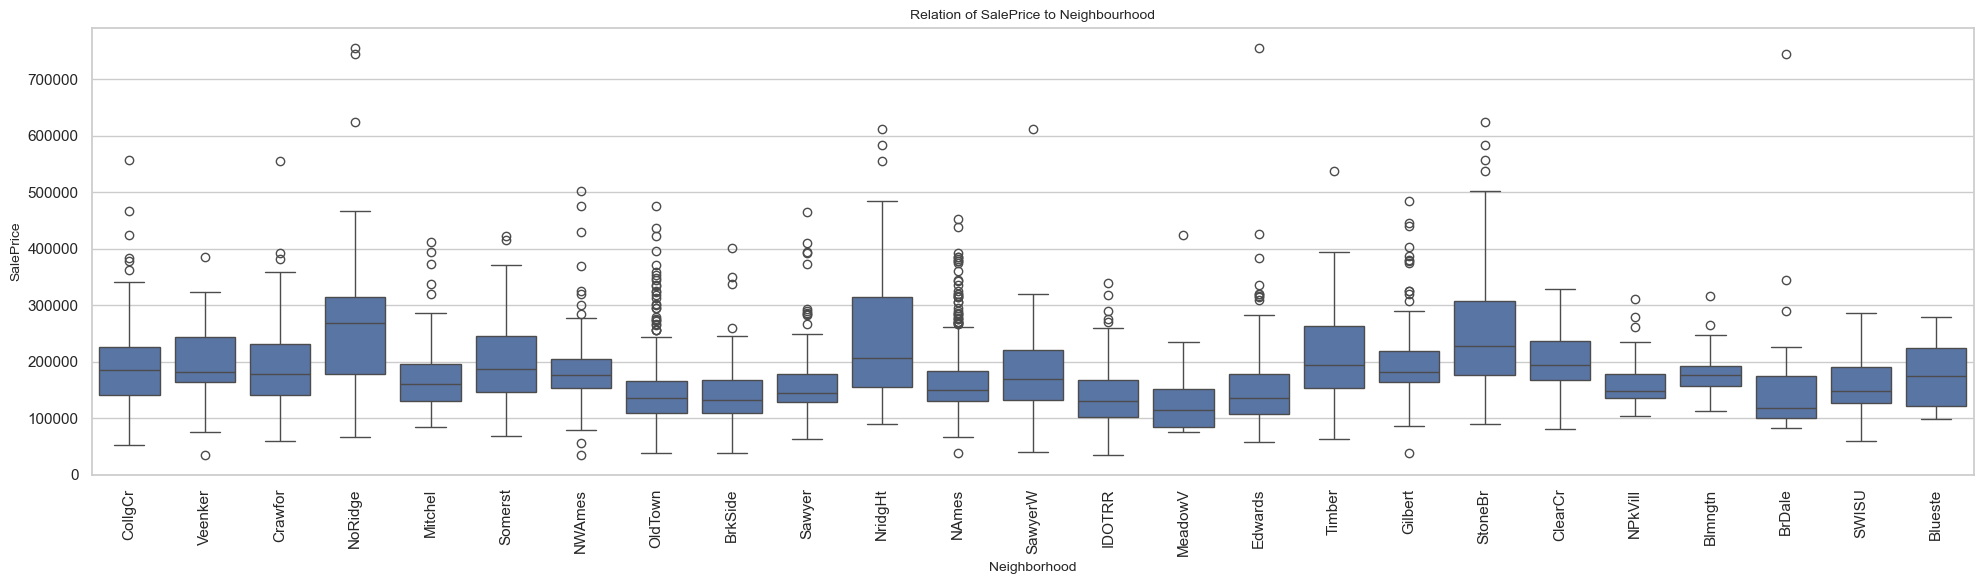

In [74]:
plt.figure(figsize=(20,6))
a = sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
a.tick_params(axis='x', rotation=90)
plt.title('Relation of SalePrice to Neighbourhood')
plt.tight_layout()
plt.show()

### Resolve Outliers

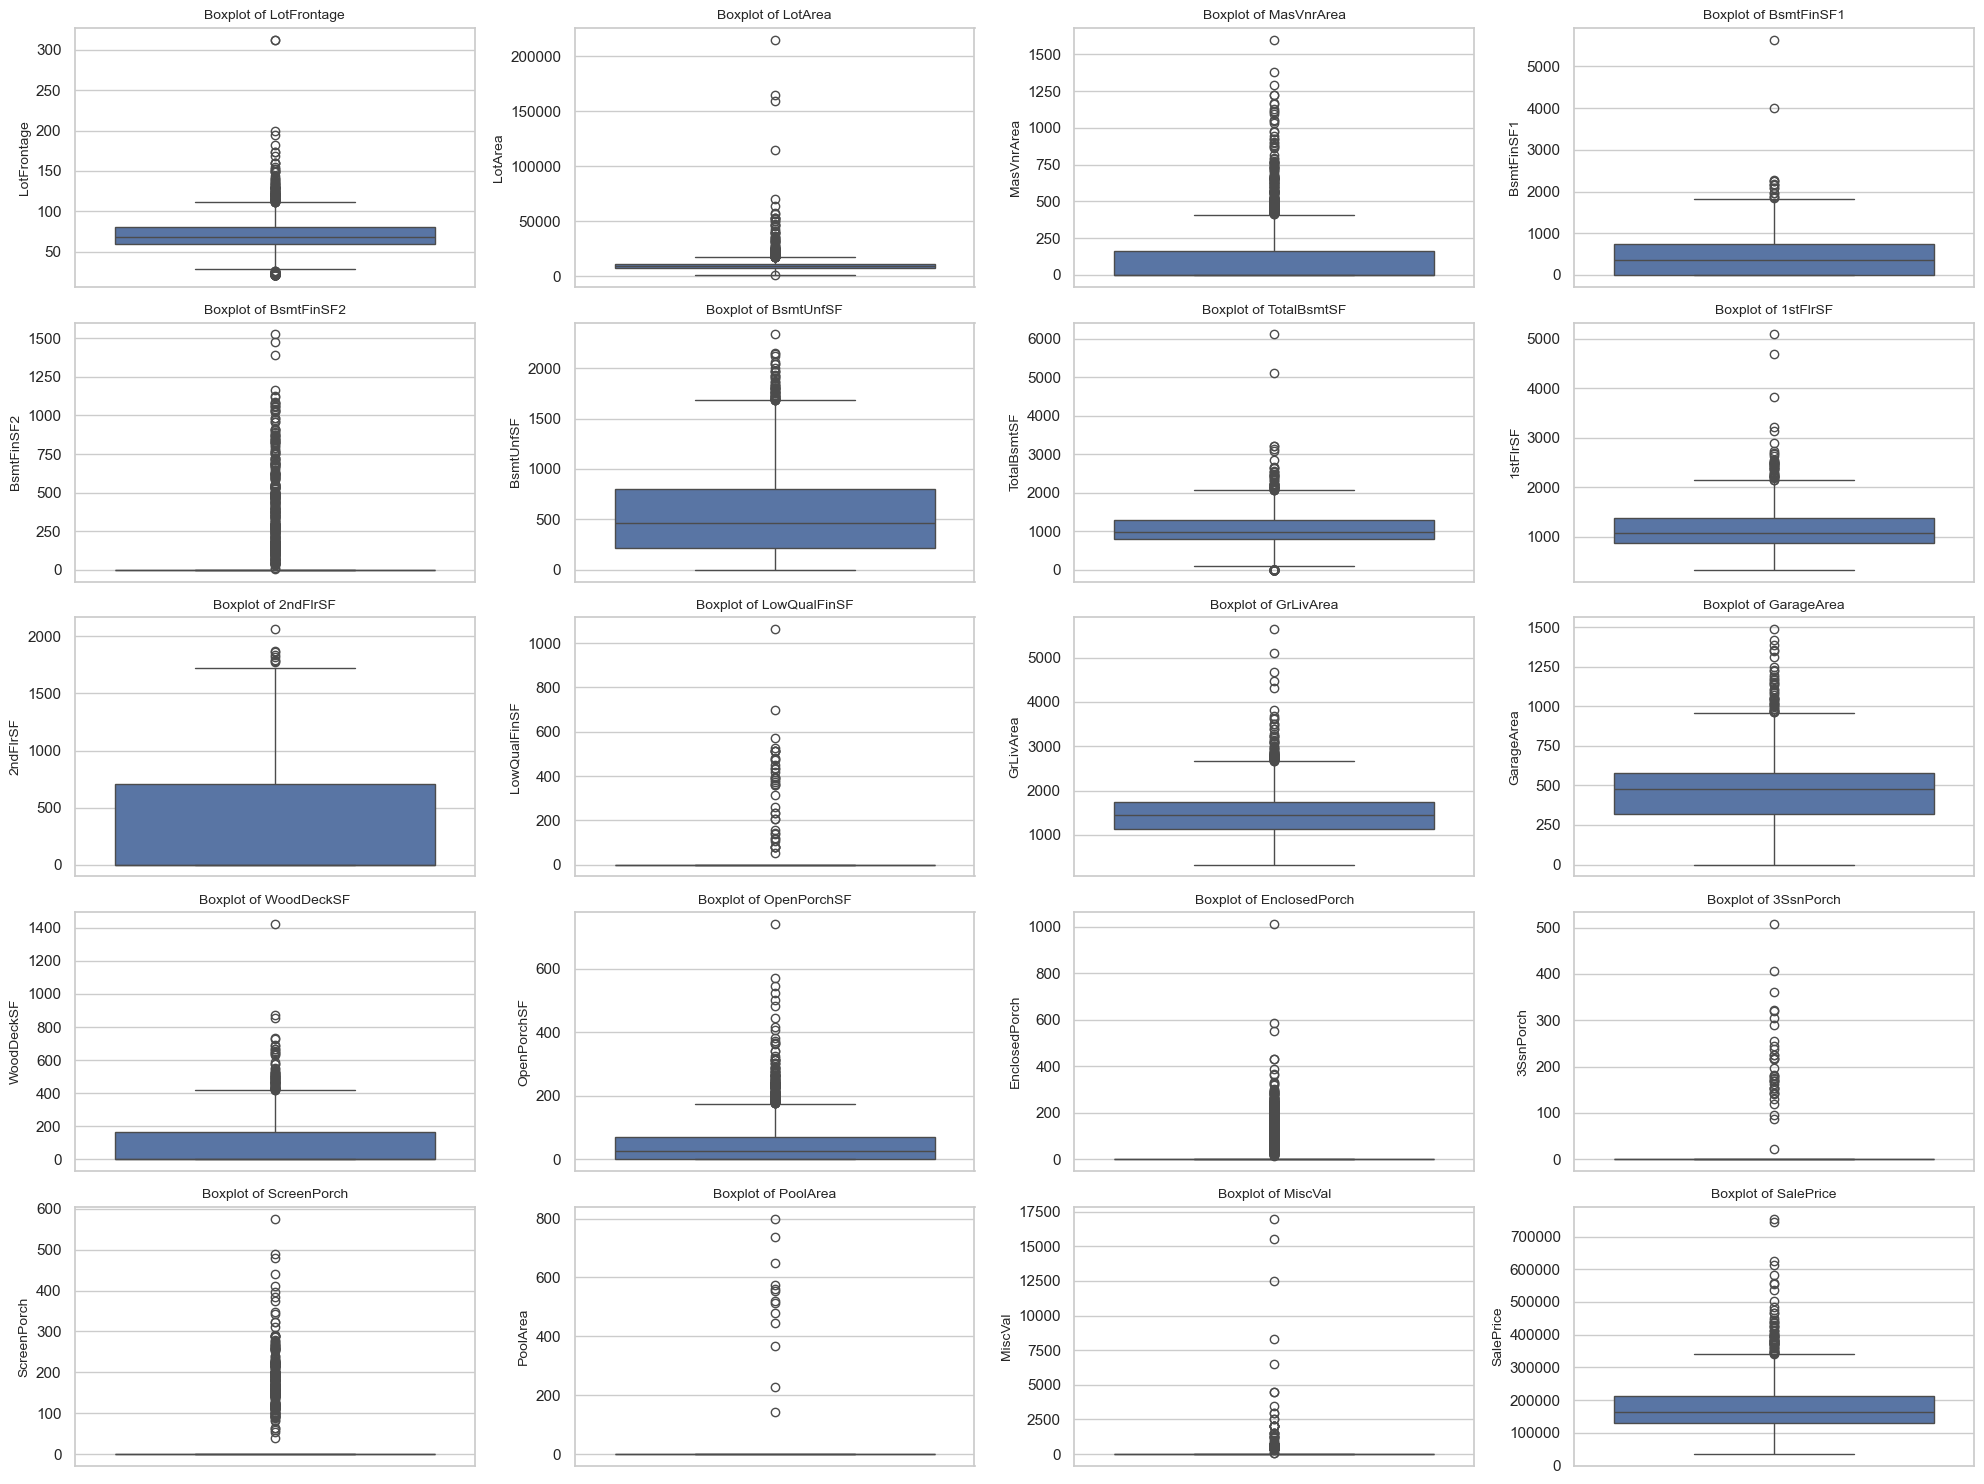

In [76]:
num_columns = numerical_features.columns 
# Visualizing numerical features for outliers using boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show() 

In [77]:
# Calculate outlier thresholds
def outlier_thresholds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound

In [80]:
# detect outliers
def detect_outliers(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        low, up = outlier_thresholds(df, column)
        return (df[column] > up) | (df[column] < low)
    else:
        return pd.Series(False, index=df.index)

In [82]:
detect_outliers(df, num_columns).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [84]:
# Function to check all numeric columns for outliers
def inspect_outliers(df, col_list):
    results = {}
    for col in col_list:
        results[col] = detect_outliers(df, col).any() if pd.api.types.is_numeric_dtype(df[col]) else False
    return results

In [86]:
inspect_outliers(df, numerical_features.columns)

{'LotFrontage': True,
 'LotArea': True,
 'MasVnrArea': True,
 'BsmtFinSF1': True,
 'BsmtFinSF2': True,
 'BsmtUnfSF': True,
 'TotalBsmtSF': True,
 '1stFlrSF': True,
 '2ndFlrSF': True,
 'LowQualFinSF': True,
 'GrLivArea': True,
 'GarageArea': True,
 'WoodDeckSF': True,
 'OpenPorchSF': True,
 'EnclosedPorch': True,
 '3SsnPorch': True,
 'ScreenPorch': True,
 'PoolArea': True,
 'MiscVal': True,
 'SalePrice': True}

In [88]:
# Function to display columns with outlier information
def display_outlier_info(df, col_list):
    print("Outlier thresholds for the numeric column")
    for col in col_list:
        low, up = outlier_thresholds(df, col)
        print(f"{col} : Lower Bound: {low}, Upper Bound: {up}", end="\n")
    print(end="\n\n")
    outliers_absent = []
    outliers_present = []
    for col, value in inspect_outliers(df, col_list).items():
        if value:
            outliers_present.append(col)
        else:
            outliers_absent.append(col)
    print("Columns with outliers")
    print(outliers_present)
    print(f"column count: {len(outliers_present)}", end="\n\n")
    print("Columns with no outliers")
    print(outliers_absent)
    print(f"column count: {len(outliers_absent)}", end="\n\n")
    
    return outliers_present, outliers_absent

In [90]:
outliers_present, outliers_absent = display_outlier_info(df, num_columns)

Outlier thresholds for the numeric column
LotFrontage : Lower Bound: 27.5, Upper Bound: 111.5
LotArea : Lower Bound: 1340.0, Upper Bound: 17708.0
MasVnrArea : Lower Bound: -246.0, Upper Bound: 410.0
BsmtFinSF1 : Lower Bound: -1099.5, Upper Bound: 1832.5
BsmtFinSF2 : Lower Bound: 0.0, Upper Bound: 0.0
BsmtUnfSF : Lower Bound: -658.25, Upper Bound: 1683.75
TotalBsmtSF : Lower Bound: 29.5, Upper Bound: 2065.5
1stFlrSF : Lower Bound: 108.75, Upper Bound: 2154.75
2ndFlrSF : Lower Bound: -1056.0, Upper Bound: 1760.0
LowQualFinSF : Lower Bound: 0.0, Upper Bound: 0.0
GrLivArea : Lower Bound: 199.75, Upper Bound: 2669.75
GarageArea : Lower Bound: -64.0, Upper Bound: 960.0
WoodDeckSF : Lower Bound: -252.0, Upper Bound: 420.0
OpenPorchSF : Lower Bound: -105.0, Upper Bound: 175.0
EnclosedPorch : Lower Bound: 0.0, Upper Bound: 0.0
3SsnPorch : Lower Bound: 0.0, Upper Bound: 0.0
ScreenPorch : Lower Bound: 0.0, Upper Bound: 0.0
PoolArea : Lower Bound: 0.0, Upper Bound: 0.0
MiscVal : Lower Bound: 0.0, 

#### Target Feature Correlation

In [92]:
# Correlation between the numerical feature and target
corr = numerical_features.corr(method='pearson')['SalePrice']

In [94]:
corr.sort_values(ascending=False)[:]

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

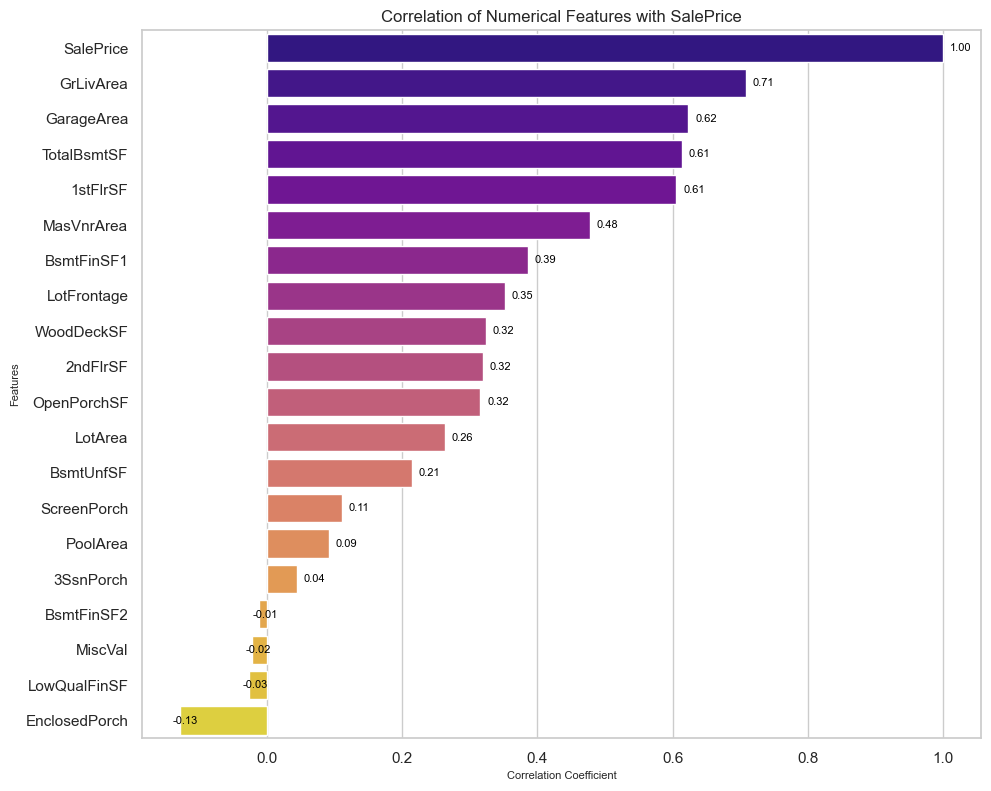

In [96]:
sorted_corr = corr.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=0.8)
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='plasma')

for i, v in enumerate(sorted_corr.values):
    plt.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.2f}', va='center', color='black', fontsize=8)

plt.title('Correlation of Numerical Features with SalePrice', fontsize=12)
plt.xlabel('Correlation Coefficient', fontsize=8)
plt.ylabel('Features', fontsize=8)
plt.tight_layout()
plt.show()

In [98]:
# Top 10 strongly correlated variables with SalePrice
corr.sort_values(ascending=False).head(11)

SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
MasVnrArea     0.477493
BsmtFinSF1     0.386420
LotFrontage    0.351799
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
Name: SalePrice, dtype: float64

In [100]:
top_ten_corr = numerical_features[['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
                                   'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 
                                   '2ndFlrSF', 'OpenPorchSF', 'SalePrice']]

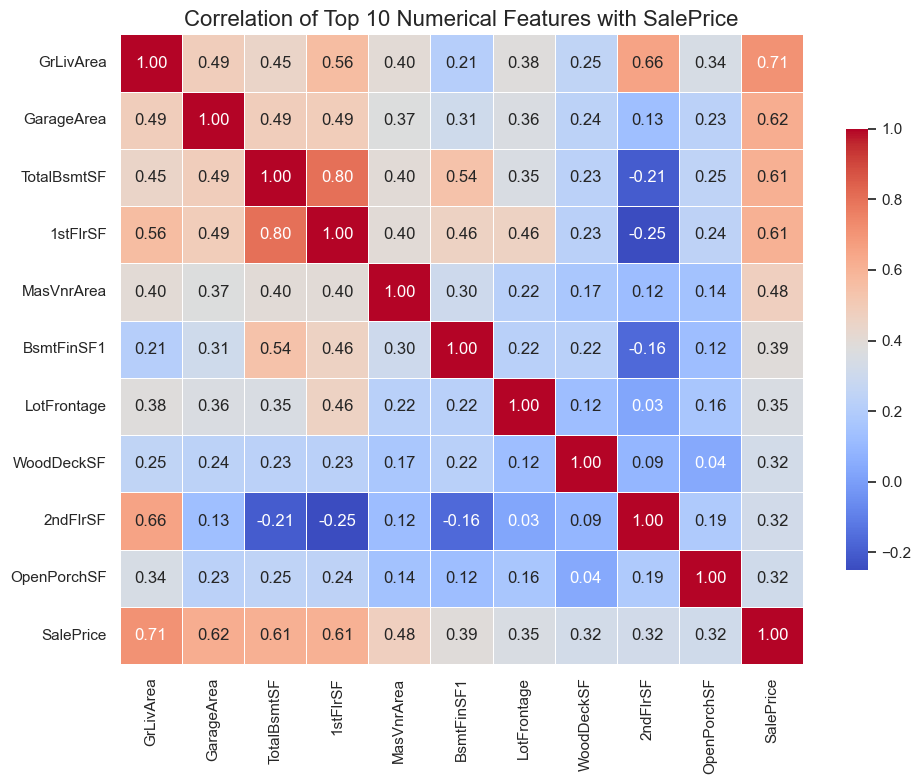

In [106]:
corrmatrix = top_ten_corr.corr()
cols = top_ten_corr.columns

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.0)
sns.heatmap(corrmatrix, 
            cmap="coolwarm", 
            cbar=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.7},
            linecolor='white', 
            annot=True, 
            fmt='.2f',
            yticklabels=cols,
            xticklabels=cols)

plt.title('Correlation of Top 10 Numerical Features with SalePrice', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

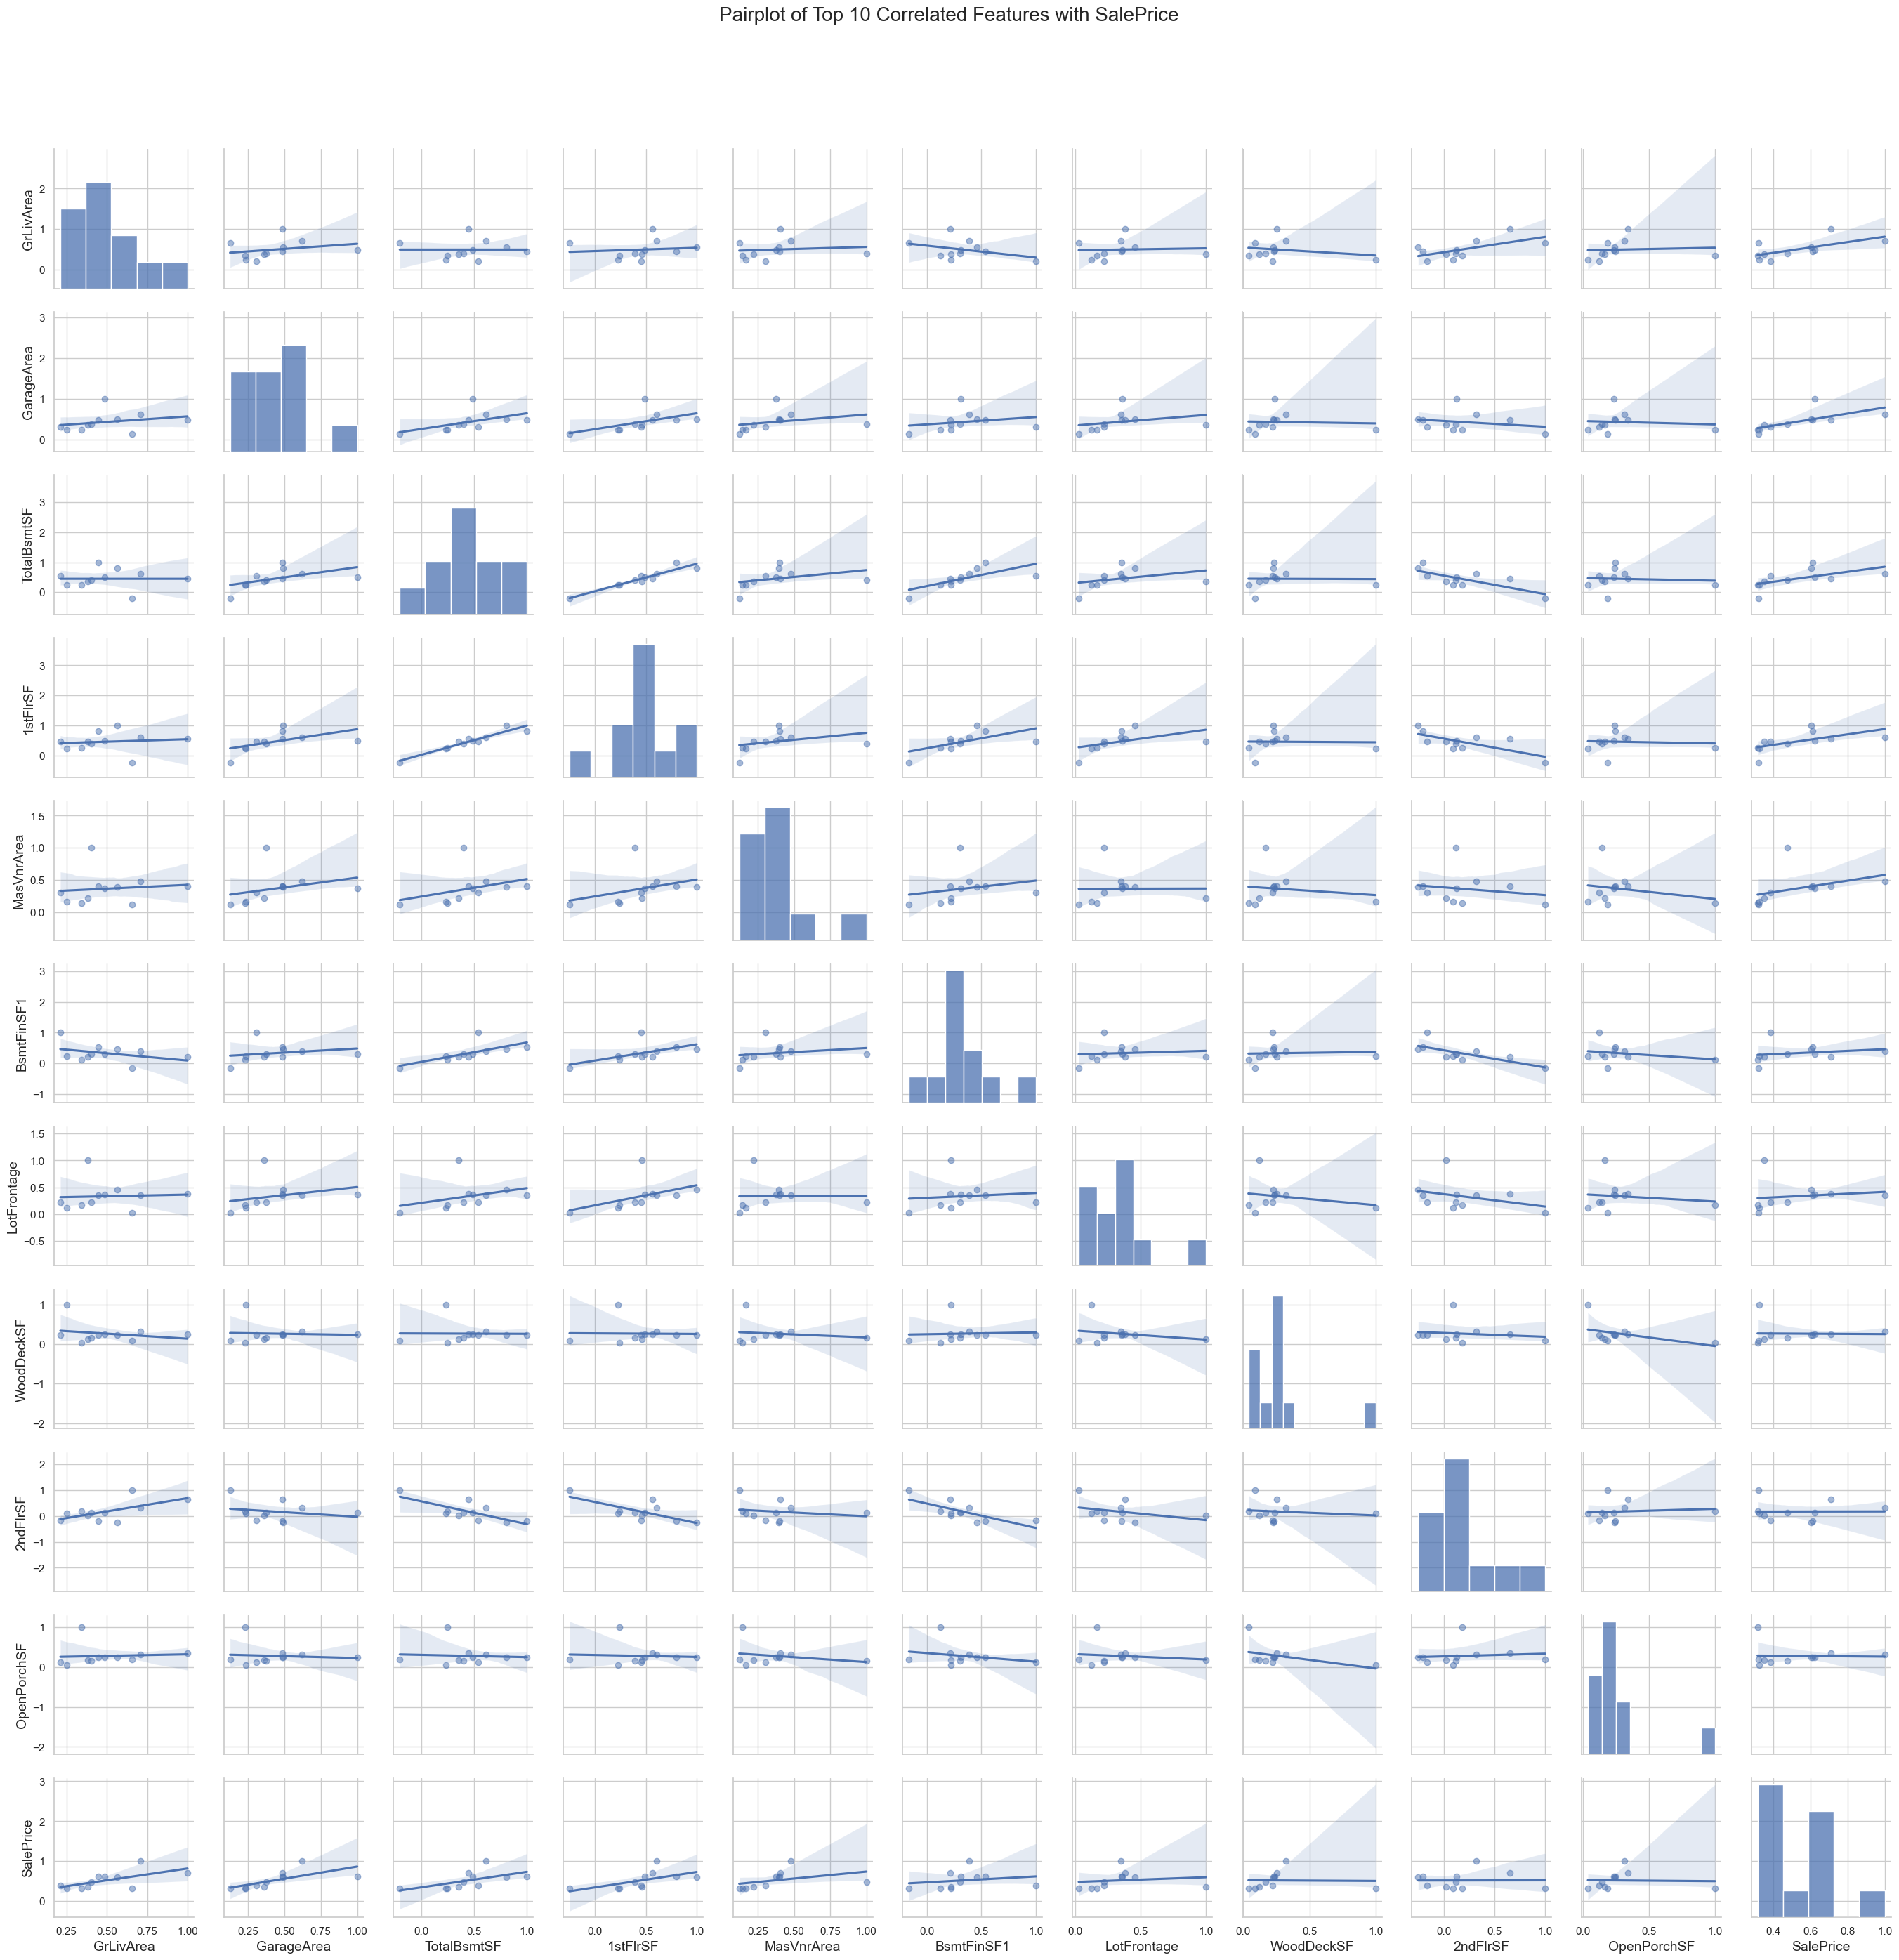

In [108]:
plt.figure(figsize=(20,6))
sns.set_theme(style="whitegrid", rc={"axes.labelsize": 14, "axes.titlesize": 16})
pairplot = sns.pairplot(
    corrmatrix, 
    kind='reg', 
    plot_kws={
        "scatter_kws": {"alpha": 0.5}
    },
    corner=False
)
pairplot.fig.suptitle('Pairplot of Top 10 Correlated Features with SalePrice', y=1.02, fontsize=20)
plt.tight_layout(pad=2.0, rect=[0, 0, 1, 0.98])
plt.show()

## Data Preprocessing
**Handle Missing Values**

In [110]:
null_values.head(20)

Count   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
MasVnrType     1766  0.605002
SalePrice      1459  0.499829
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageCond      159  0.054471
GarageYrBlt     159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrArea       23  0.007879
MSZoning          4  0.001370

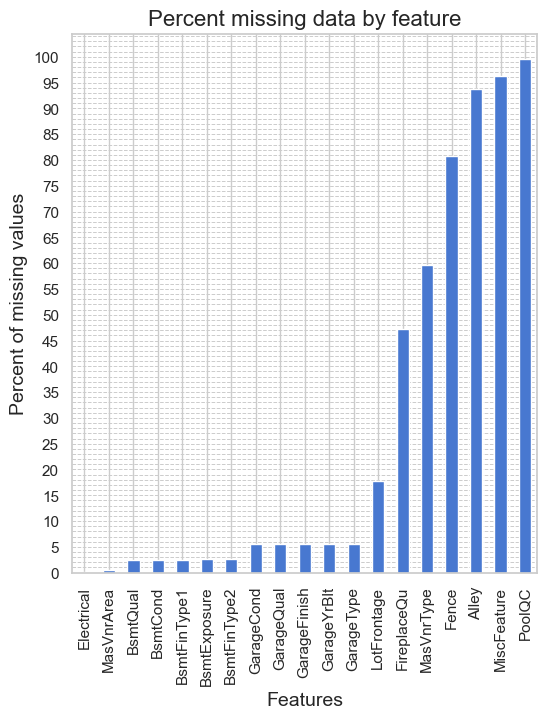

In [112]:
# Visualize missing values
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(6, 7))

sns.set_color_codes(palette='muted')
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing.plot.bar(color="b", ax=ax)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")

ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))


plt.show()

In [114]:
df.MasVnrType=["Missing" if x is np.nan else x for x in df.MasVnrType]

In [116]:
df.Electrical=["Missing" if x is np.nan else x for x in df.Electrical]

In [118]:
print(df.MasVnrType.unique())
print(df.Electrical.unique())

['BrkFace' 'Missing' 'Stone' 'BrkCmn']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'Missing']


In [120]:
df.FireplaceQu=["No Firepl" if x is np.nan else x for x in df.FireplaceQu]

In [122]:
df.Alley=["No Alley" if x is np.nan else x for x in df.Alley]

In [124]:
df.PoolQC=["No Pool" if x is np.nan else x for x in df.PoolQC]

In [126]:
df.Fence=["No Fence" if x is np.nan else x for x in df.Fence]

In [128]:
df.MiscFeature=["None" if x is np.nan else x for x in df.MiscFeature]

In [130]:
df.BsmtQual=["No Bsmnt" if x is np.nan else x for x in df.BsmtQual]

In [132]:
df.BsmtCond=["No Bsmnt" if x is np.nan else x for x in df.BsmtCond]

In [134]:
df.BsmtExposure=["No Bsmnt" if x is np.nan else x for x in df.BsmtExposure]

In [136]:
df.BsmtFinType1=["No Bsmnt" if x is np.nan else x for x in df.BsmtFinType1]

In [138]:
df.BsmtFinType2=["No Bsmnt" if x is np.nan else x for x in df.BsmtFinType2]

In [140]:
df.GarageType=["No Grg" if x is np.nan else x for x in df.GarageType]

In [142]:
df.GarageFinish=["No Grg" if x is np.nan else x for x in df.GarageFinish]

In [144]:
df.GarageCond=["No Grg" if x is np.nan else x for x in df.GarageCond]

In [146]:
df.GarageQual=["No Grg" if x is np.nan else x for x in df.GarageQual]

In [148]:
print(df.FireplaceQu.unique())
print(df.Alley.unique())
print(df.PoolQC.unique())
print(df.Fence.unique())
print(df.MiscFeature.unique())
print(df.BsmtQual.unique())
print(df.BsmtCond.unique())
print(df.BsmtExposure.unique())
print(df.BsmtFinType1.unique())
print(df.BsmtFinType2.unique())
print(df.GarageType.unique())
print(df.GarageFinish.unique())
print(df.GarageCond.unique())
print(df.GarageQual.unique())

['No Firepl' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['No Alley' 'Grvl' 'Pave']
['No Pool' 'Ex' 'Fa' 'Gd']
['No Fence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['None' 'Shed' 'Gar2' 'Othr' 'TenC']
['Gd' 'TA' 'Ex' 'No Bsmnt' 'Fa']
['TA' 'Gd' 'No Bsmnt' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'No Bsmnt']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Bsmnt' 'LwQ']
['Unf' 'BLQ' 'No Bsmnt' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No Grg' 'Basment' '2Types']
['RFn' 'Unf' 'Fin' 'No Grg']
['TA' 'Fa' 'No Grg' 'Gd' 'Po' 'Ex']
['TA' 'Fa' 'Gd' 'No Grg' 'Ex' 'Po']


In [150]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorch

In [152]:
df.head

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour Utilities  \
0             60       RL         65.0     8450   Pave  No Alley      Reg         Lvl    AllPub   
1             20       RL         80.0     9600   Pave  No Alley      Reg         Lvl    AllPub   
2             60       RL         68.0    11250   Pave  No Alley      IR1         Lvl    AllPub   
3             70       RL         60.0     9550   Pave  No Alley      IR1         Lvl    AllPub   
4             60       RL         84.0    14260   Pave  No Alley      IR1         Lvl    AllPub   
...          ...      ...          ...      ...    ...       ...      ...         ...       ...   
1454         160       RM         21.0     1936   Pave  No Alley      Reg         Lvl    AllPub   
1455         160       RM         21.0     1894   Pave  No Alley      Reg         Lvl    AllPub   
1456          20       RL        160.0    20000   Pave  No Alley      Reg      

**The numerical features with null(missing) values (LotFrontage, GarageYrBlt, MasVnrArea) will be resolved using mean imputation. This method will replace missing values with the average of the available data for each respective feature.**

In [154]:
df['LotFrontage'].interpolate(method='linear', axis=0, inplace=True)

In [156]:
df['GarageYrBlt'].interpolate(method='linear', axis=0, inplace=True)

In [158]:
df['MasVnrArea'].interpolate(method='linear', axis=0, inplace=True)

In [160]:
temp_df = df.copy()
temp_df = temp_df.drop('SalePrice', axis=1)

In [162]:
# Null values left?
temp_df.isnull().values.any()

True

In [164]:
null_counts = temp_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64


In [166]:
numeric_cols = numerical_features.columns
categoric_cols = categorical_features.columns

# Impute categorical variables
for col in categoric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [168]:
# Impute numerical variables
zero_impute = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for col in zero_impute:
    df[col] = df[col].fillna(0)

In [172]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# For remaining numerical features, use KNN imputation
knn_columns = [col for col in numeric_cols if df[col].isnull().sum() > 0 and col not in zero_impute]
if knn_columns:
    knn_imputer = KNNImputer(n_neighbors=5)
    df[knn_columns] = pd.DataFrame(knn_imputer.fit_transform(df[knn_columns]), columns=knn_columns, index=df.index)

In [174]:
# Verify imputation
print("Columns with missing values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Columns with missing values after imputation:
Series([], dtype: int64)


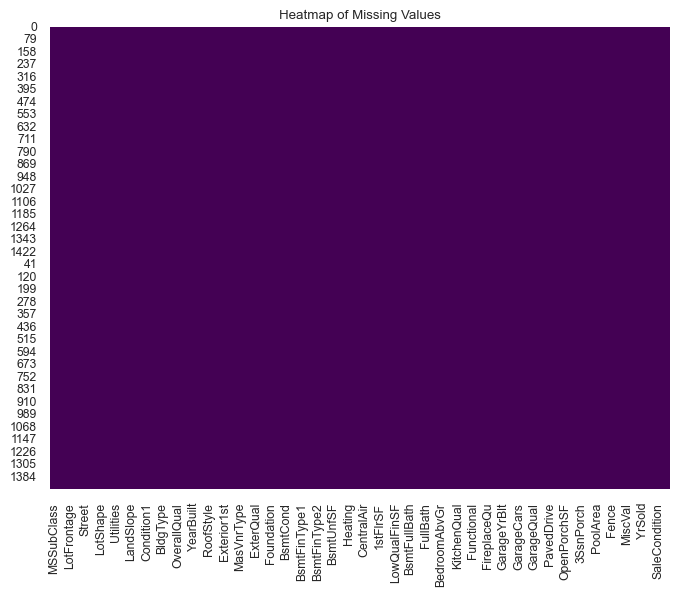

In [178]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [180]:
temp_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour Utilities  \
0          60       RL         65.0     8450   Pave  No Alley      Reg         Lvl    AllPub   
1          20       RL         80.0     9600   Pave  No Alley      Reg         Lvl    AllPub   
2          60       RL         68.0    11250   Pave  No Alley      IR1         Lvl    AllPub   
3          70       RL         60.0     9550   Pave  No Alley      IR1         Lvl    AllPub   
4          60       RL         84.0    14260   Pave  No Alley      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y   
1       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y   
2       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y   
3       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y   
4       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710           1.0           0.0         2   
1      SBrkr      1262         0             0       1262           0.0           1.0         2   
2      SBrkr       920       866             0       1786           1.0           0.0         2   
3      SBrkr       961       756             0       1717           1.0           0.0         1   
4      SBrkr      1145      1053             0       2198           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [182]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour Utilities  \
0          60       RL         65.0     8450   Pave  No Alley      Reg         Lvl    AllPub   
1          20       RL         80.0     9600   Pave  No Alley      Reg         Lvl    AllPub   
2          60       RL         68.0    11250   Pave  No Alley      IR1         Lvl    AllPub   
3          70       RL         60.0     9550   Pave  No Alley      IR1         Lvl    AllPub   
4          60       RL         84.0    14260   Pave  No Alley      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y   
1       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y   
2       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y   
3       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y   
4       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710           1.0           0.0         2   
1      SBrkr      1262         0             0       1262           0.0           1.0         2   
2      SBrkr       920       866             0       1786           1.0           0.0         2   
3      SBrkr       961       756             0       1717           1.0           0.0         1   
4      SBrkr      1145      1053             0       2198           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [184]:
df.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour Utilities  \
1454         160       RM         21.0     1936   Pave  No Alley      Reg         Lvl    AllPub   
1455         160       RM         21.0     1894   Pave  No Alley      Reg         Lvl    AllPub   
1456          20       RL        160.0    20000   Pave  No Alley      Reg         Lvl    AllPub   
1457          85       RL         62.0    10441   Pave  No Alley      Reg         Lvl    AllPub   
1458          60       RL         74.0     9627   Pave  No Alley      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
1454    Inside       Gtl      MeadowV       Norm       Norm    Twnhs     2Story            4   
1455    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE     2Story            4   
1456    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1Story            5   
1457    Inside       Gtl      Mitchel       Norm       Norm     1Fam     SFoyer            5   
1458    Inside       Mod      Mitchel       Norm       Norm     1Fam     2Story            7   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454            7       1970          1970     Gable  CompShg     CemntBd     CmentBd    Missing   
1455            5       1970          1970     Gable  CompShg     CemntBd     CmentBd    Missing   
1456            7       1960          1996     Gable  CompShg     VinylSd     VinylSd    Missing   
1457            5       1992          1992     Gable  CompShg     HdBoard     Wd Shng    Missing   
1458            5       1993          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
1454         0.0        TA        TA     CBlock       TA       TA           No          Unf   
1455         0.0        TA        TA     CBlock       TA       TA           No          Rec   
1456         0.0        TA        TA     CBlock       TA       TA           No          ALQ   
1457         0.0        TA        TA      PConc       Gd       TA           Av          GLQ   
1458        94.0        TA        TA      PConc       Gd       TA           Av          LwQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
1454         0.0          Unf         0.0      546.0        546.0    GasA        Gd          Y   
1455       252.0          Unf         0.0      294.0        546.0    GasA        TA          Y   
1456      1224.0          Unf         0.0        0.0       1224.0    GasA        Ex          Y   
1457       337.0          Unf         0.0      575.0        912.0    GasA        TA          Y   
1458       758.0          Unf         0.0      238.0        996.0    GasA        Ex          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454      SBrkr       546       546             0       1092           0.0           0.0   
1455      SBrkr       546       546             0       1092           0.0           0.0   
1456      SBrkr      1224         0             0       1224           1.0           0.0   
1457      SBrkr       970         0             0        970           0.0           1.0   
1458      SBrkr       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1454         1         1             3             1          TA             5        Typ   
1455         1         1             3             1          TA             6        Typ   
1456         1         0             4             1          TA             7        Typ   
1457         1         0             3             1          TA             6        Typ   
1458         2         1             3             1   

In [186]:
# Target feature description 
df['SalePrice'].describe()

count      2919.000000
mean     180921.195890
std       56174.332503
min       34900.000000
25%      163000.000000
50%      180921.195890
75%      180921.195890
max      755000.000000
Name: SalePrice, dtype: float64

In [188]:
# Resolve Outliers
def threshold_resolution(df, column):
    low, up = outlier_thresholds(df, column)
    df.loc[df[column] < low, column] = low
    df.loc[df[column] > up, column] = up
    return low, up

In [190]:
df[outliers_present].dtypes

LotFrontage      float64
LotArea            int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
SalePrice        float64
dtype: object

In [192]:
for col in outliers_present:
    if col not in ['SalePrice']:
        threshold_resolution(df, col)

#### Create new features

In [194]:
# New Features for Housing Dataset

# Total square footage
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# Age of the house at time of sale
df['Age'] = df['YrSold'] - df['YearBuilt']

# Total number of bathrooms
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

# Boolean indicator for pool presence
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# Total porch area
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Total parking capacity, considering paved drive
df['TotalParking'] = df['GarageCars'] + df['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)

# Boolean indicator for remodeling 
df['Remodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)

# Years since last remodel at time of sale
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd'].astype(int)

# Total number of rooms 
df['TotalRooms'] = df['TotRmsAbvGrd']

# Ratio of living area to lot area
df['LotRatio'] = df['GrLivArea'] / df['LotArea']

# Sale price per square foot (if SalePrice is available)
if 'SalePrice' in df.columns:
    df['PricePerSqFt'] = df['SalePrice'] / df['TotalSF']

# Categorical age group of the house
def age_group(age):
    if age <= 10:
        return 'New'
    elif age <= 30:
        return 'Modern'
    elif age <= 50:
        return 'Mature'
    else:
        return 'Old'

df['AgeGroup'] = df['Age'].apply(age_group)

# Total outdoor living space
df['TotalOutdoorSF'] = df['WoodDeckSF'] + df['TotalPorchSF']

# Boolean indicator for fireplace presence
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [196]:
# Mapping for OverallQual to match ExterQual and KitchenQual ratings
overall_qual_map = {
    10: 'Ex',  # Very Excellent
    9:  'Ex',  # Excellent
    8:  'Gd',  # Very Good
    7:  'Gd',  # Good
    6:  'TA',  # Above Average
    5:  'TA',  # Average
    4:  'Fa',  # Below Average
    3:  'Fa',  # Fair
    2:  'Po',  # Poor
    1:  'Po'   # Very Poor
}

# Apply the mapping to convert OverallQual to qualitative categories
df['OverallQualCategory'] = df['OverallQual'].map(overall_qual_map)

# Print the updated dataframe to check the new category column
print(df[['OverallQual', 'OverallQualCategory', 'ExterQual', 'KitchenQual']].head())


   OverallQual OverallQualCategory ExterQual KitchenQual
0            7                  Gd        Gd          Gd
1            6                  TA        TA          TA
2            7                  Gd        Gd          Gd
3            7                  Gd        TA          Gd
4            8                  Gd        Gd          Gd


In [198]:
# Mapping for ExterQual and KitchenQual
quality_map = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}

df['ExterQual'] = df['ExterQual'].map(quality_map)
df['KitchenQual'] = df['KitchenQual'].map(quality_map)
df['OverallQualCategory'] = df['OverallQualCategory'].map(quality_map)

In [200]:
print(df[['OverallQual', 'OverallQualCategory', 'ExterQual', 'KitchenQual']].head())

   OverallQual  OverallQualCategory  ExterQual  KitchenQual
0            7                    4          4            4
1            6                    3          3            3
2            7                    4          4            4
3            7                    4          3            4
4            8                    4          4            4


In [202]:
print(df[['OverallQual', 'OverallQualCategory', 'ExterQual', 'KitchenQual']].dtypes)

OverallQual            int64
OverallQualCategory    int64
ExterQual              int64
KitchenQual            int64
dtype: object


In [204]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour Utilities  \
0          60       RL         65.0     8450   Pave  No Alley      Reg         Lvl    AllPub   
1          20       RL         80.0     9600   Pave  No Alley      Reg         Lvl    AllPub   
2          60       RL         68.0    11250   Pave  No Alley      IR1         Lvl    AllPub   
3          70       RL         60.0     9550   Pave  No Alley      IR1         Lvl    AllPub   
4          60       RL         84.0    14260   Pave  No Alley      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0          4        TA      PConc       Gd       TA           No          GLQ   
1         0.0          3        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0          4        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0          3        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0          4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y   
1       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y   
2       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y   
3       216.0          Unf         0.0      540.0        756.0    GasA        Gd          Y   
4       655.0          Unf         0.0      490.0       1145.0    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr     856.0       854             0     1710.0           1.0           0.0         2   
1      SBrkr    1262.0         0             0     1262.0           0.0           1.0         2   
2      SBrkr     920.0       866             0     1786.0           1.0           0.0         2   
3      SBrkr     961.0       756             0     1717.0           1.0           0.0         1   
4      SBrkr    1145.0      1053             0     2198.0           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1            4             8        Typ           0   
1         0             3             1            3             6        Typ           1   
2         1             3             1            4             6        Typ           1   
3         0             3             1            4             7        Typ           1   
4         1             4             1            4             9        Typ           1   



In [206]:
# Combined quality score
df['QualityScore'] = (df['OverallQualCategory'] + df['ExterQual'] + df['KitchenQual']) / 3

### Encoding

**Categorical Features**

In [208]:
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [210]:
binary_columns = [col for col in df.columns if (df[col].dtypes not in ["float64","int64","int32"]) & (df[col].nunique() == 2)]
binary_columns

['Street', 'Utilities', 'CentralAir']

In [214]:
labelencoder = LabelEncoder()

for col in binary_columns:
    df[col] = labelencoder.fit_transform(df[col])

In [216]:
ohe_cols = [col for col in df.columns if (df[col].dtype not in ['float64','int64','int32']) & ((df[col].nunique() > 2) | (df[col].nunique() == 1))]
ohe_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'AgeGroup']

In [218]:
df = pd.get_dummies(df, columns=ohe_cols).reset_index(drop=True)
df.shape

(2919, 314)

In [220]:
df = df.loc[:,~df.columns.duplicated()]

**Scaling Numerical Features**

In [222]:
scaling_feature=[feature for feature in df.columns if feature not in ['SalePrice'] ]
len(scaling_feature)

313

In [224]:
scaling_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'Utilities',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalSF',
 'Age',
 'TotalBathrooms',
 'HasPool',
 'TotalPorchSF',
 'TotalParking',
 'Remodeled',
 'YearsSinceRemodel',
 'TotalRooms',
 'LotRatio',
 'PricePerSqFt',
 'TotalOutdoorSF',
 'HasFireplace',
 'OverallQualCategory',
 'QualityScore',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_Grvl',
 'Alley_No Alley',
 'Alley_Pave',
 'LotShape_IR1',


In [230]:
minmax_scaler = MinMaxScaler()
df[scaling_feature] = minmax_scaler.fit_transform(df[scaling_feature])

In [234]:
sscaler_cols = numerical_features.columns.tolist() + temporal_features.columns.tolist()
sscaler_cols = [col for col in sscaler_cols if col not in ["SalePrice"]]

standard_scaler = StandardScaler()
df[sscaler_cols] = standard_scaler.fit_transform(df[sscaler_cols])

In [236]:
df.head()

MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  \
0    0.235294    -0.205444 -0.311935     1.0        0.0     0.666667        0.500   1.046258   
1    0.000000     0.574158  0.006504     1.0        0.0     0.555556        0.875   0.154764   
2    0.235294    -0.049524  0.463393     1.0        0.0     0.666667        0.500   0.980221   
3    0.294118    -0.465311 -0.007341     1.0        0.0     0.666667        0.500  -1.859351   
4    0.235294     0.782052  1.296871     1.0        0.0     0.777778        0.500   0.947203   

   YearRemodAdd  MasVnrArea  ExterQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.896833    0.802427   0.666667    0.611742         0.0  -0.945461    -0.463145   
1     -0.395604   -0.664199   0.333333    1.232893         0.0  -0.634752     0.531326   
2      0.848965    0.548012   0.666667    0.109341         0.0  -0.286944    -0.306381   
3     -0.682812   -0.664199   0.333333   -0.507242         0.0  -0.041160    -0.708089   
4      0.753229    1.954776   0.666667    0.495277         0.0  -0.157096     0.244742   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         1.0 -0.814398  1.210474           0.0   0.468138      0.333333           0.0      0.50   
1         1.0  0.297983 -0.786066           0.0  -0.487452      0.000000           0.5      0.50   
2         1.0 -0.639047  1.238529           0.0   0.630247      0.333333           0.0      0.50   
3         1.0 -0.526713  0.981363           0.0   0.483069      0.333333           0.0      0.25   
4         1.0 -0.022580  1.675710           0.0   1.509048      0.333333           0.0      0.50   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0       0.5         0.375      0.333333     0.666667      0.461538        0.00     0.996844   
1       0.0         0.375      0.333333     0.333333      0.307692        0.25    -0.061674   
2       0.5         0.375      0.333333     0.666667      0.307692        0.25     0.918435   
3       0.0         0.375      0.333333     0.666667      0.384615        0.25     0.800822   
4       0.5         0.500      0.333333     0.666667      0.538462        0.25     0.879231   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         0.4    0.371405   -0.785506     0.327500            0.0        0.0          0.0   
1         0.4   -0.050024    1.785833    -0.812920            0.0        0.0          0.0   
2         0.4    0.658743   -0.785506    -0.027713            0.0        0.0          0.0   
3         0.6    0.821567   -0.785506    -0.158581            0.0        0.0          0.0   
4         0.6    1.750626    0.871196     0.757494            0.0        0.0          0.0   

   PoolArea  MiscVal    MoSold    YrSold  SalePrice   TotalSF       Age  TotalBathrooms  HasPool  \
0       0.0      0.0 -1.552184  0.157646   208500.0  0.392131  0.043796        0.416667      0.0   
1       0.0      0.0 -0.446925 -0.602962   181500.0  0.384653  0.233577        0.250000      0.0   
2       0.0      0.0  1.026753  0.157646   223500.0  0.417056  0.058394        0.416667      0.0   
3       0.0      0.0 -1.552184 -1.363569   140000.0  0.375573  0.671533        0.166667      0.0   
4       0.0      0.0  2.132012  0.157646   250000.0  0.530467  0.065693        0.416667      0.0   

   TotalPorchSF  TotalParking  Remodeled  YearsSinceRemodel  TotalRooms  LotRatio  PricePerSqFt  \
0      0.348571           0.6        0.0           0.112903    0.461538  0.164133      0.232759   
1      0.000000           0.6        0.0           0.532258    0.307692  0.089825      0.197047   
2      0.240000           0.6        1.0           0.129032    0.307692  0.118431      0.237877   
3      0.200000           0.8        1.0           0.612903    0.384615  0.140474      0.138586   
4      0.480000           0.8        0.0           0.16129

### Modeling

In [250]:
id_df = pd.DataFrame(id_var, columns=['Id'])
id_df.columns

Index(['Id'], dtype='object')

In [258]:
id_df.reset_index(drop=True, inplace=True)

In [262]:
df = pd.concat([df, id_df], axis=1)

In [272]:
df[['Id', 'SalePrice']].info

<bound method DataFrame.info of         Id     SalePrice
0        1  208500.00000
1        2  181500.00000
2        3  223500.00000
3        4  140000.00000
4        5  250000.00000
...    ...           ...
2914  2915  180921.19589
2915  2916  180921.19589
2916  2917  180921.19589
2917  2918  180921.19589
2918  2919  180921.19589

[2919 rows x 2 columns]>

In [274]:
df.tail()

MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  \
2914    0.823529    -2.154449 -2.115680     1.0        0.0     0.333333         0.75  -0.043346   
2915    0.823529    -2.154449 -2.127310     1.0        0.0     0.333333         0.50  -0.043346   
2916    0.000000     2.211322  2.251632     1.0        0.0     0.444444         0.75  -0.373528   
2917    0.382353    -0.361364  0.239379     1.0        0.0     0.444444         0.50   0.683057   
2918    0.235294     0.262317  0.013980     1.0        0.0     0.666667         0.50   0.716075   

      YearRemodAdd  MasVnrArea  ExterQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
2914     -0.682812   -0.664199   0.333333   -1.000508         0.0  -0.027248    -1.222470   
2915     -0.682812   -0.664199   0.333333   -0.425031         0.0  -0.611565    -1.222470   
2916      0.561757   -0.664199   0.333333    1.794668         0.0  -1.293269     0.438247   
2917      0.370284   -0.664199   0.333333   -0.230921         0.0   0.039995    -0.325977   
2918      0.466021    0.039183   0.333333    0.730492         0.0  -0.741414    -0.120224   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2914         1.0 -1.663753  0.490410           0.0  -0.850064      0.000000           0.0   
2915         1.0 -1.663753  0.490410           0.0  -0.850064      0.000000           0.0   
2916         1.0  0.193868 -0.786066           0.0  -0.568506      0.333333           0.0   
2917         1.0 -0.502055 -0.786066           0.0  -1.110292      0.000000           0.5   
2918         1.0 -0.430818  1.561155           0.0   1.086712      0.000000           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
2914      0.25       0.5         0.375      0.333333     0.333333      0.230769        0.00   
2915      0.25       0.5         0.375      0.333333     0.333333      0.307692        0.00   
2916      0.25       0.0         0.500      0.333333     0.333333      0.384615        0.25   
2917      0.25       0.0         0.375      0.333333     0.333333      0.307692        0.00   
2918      0.50       0.5         0.375      0.333333     0.333333      0.538462        0.25   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
2914    -0.296900         0.0   -2.252947   -0.785506    -0.812920            0.0        0.0   
2915    -0.296900         0.2   -0.883304   -0.785506    -0.364231            0.0        0.0   
2916    -0.688944         0.4    0.505496    2.838529    -0.812920            0.0        0.0   
2917    -0.042072         0.0   -2.252947   -0.095214    -0.214667            0.0        0.0   
2918     0.604800         0.6    0.859879    0.853938     0.084459            0.0        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold    YrSold     SalePrice   TotalSF       Age  \
2914          0.0       0.0      0.0 -0.078505 -1.363569  180921.19589  0.226911  0.270073   
2915          0.0       0.0      0.0 -0.815344 -1.363569  180921.19589  0.226911  0.270073   
2916          0.0       0.0      0.0  1.026753 -1.363569  180921.19589  0.371122  0.343066   
2917          0.0       0.0      0.0  0.289914 -1.363569  180921.19589  0.270352  0.109489   
2918          0.0       0.0      0.0  1.763592 -1.363569  180921.19589  0.468687  0.102190   

      TotalBathrooms  HasPool  TotalPorchSF  TotalParking  Remodeled  YearsSinceRemodel  \
2914        0.083333      0.0      0.000000           0.2        0.0           0.612903   
2915        0.083333      0.0      0.137143           0.4        0.0           0.612903   
2916        0.166667      0.0      0.000000           0.6        1.0           0.193548   
2917        0.083333      0.0      0.182857           0.2        0.0           0.258065   
2918        0.250000      0.0      0.274286           0.8        1.0           0.225806   

      TotalRooms  LotRatio  Price

In [277]:
train_df = df.iloc[:1460]
test_df = df.iloc[1460:]

In [279]:
# Reset the index for both dataframes
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [281]:
#drop Target Feature from test_df
test_df = test_df.drop('SalePrice', axis=1)

In [283]:
train_df.shape, test_df.shape

((1460, 315), (1459, 314))

In [285]:
train_df.head()

MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  \
0    0.235294    -0.205444 -0.311935     1.0        0.0     0.666667        0.500   1.046258   
1    0.000000     0.574158  0.006504     1.0        0.0     0.555556        0.875   0.154764   
2    0.235294    -0.049524  0.463393     1.0        0.0     0.666667        0.500   0.980221   
3    0.294118    -0.465311 -0.007341     1.0        0.0     0.666667        0.500  -1.859351   
4    0.235294     0.782052  1.296871     1.0        0.0     0.777778        0.500   0.947203   

   YearRemodAdd  MasVnrArea  ExterQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.896833    0.802427   0.666667    0.611742         0.0  -0.945461    -0.463145   
1     -0.395604   -0.664199   0.333333    1.232893         0.0  -0.634752     0.531326   
2      0.848965    0.548012   0.666667    0.109341         0.0  -0.286944    -0.306381   
3     -0.682812   -0.664199   0.333333   -0.507242         0.0  -0.041160    -0.708089   
4      0.753229    1.954776   0.666667    0.495277         0.0  -0.157096     0.244742   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         1.0 -0.814398  1.210474           0.0   0.468138      0.333333           0.0      0.50   
1         1.0  0.297983 -0.786066           0.0  -0.487452      0.000000           0.5      0.50   
2         1.0 -0.639047  1.238529           0.0   0.630247      0.333333           0.0      0.50   
3         1.0 -0.526713  0.981363           0.0   0.483069      0.333333           0.0      0.25   
4         1.0 -0.022580  1.675710           0.0   1.509048      0.333333           0.0      0.50   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0       0.5         0.375      0.333333     0.666667      0.461538        0.00     0.996844   
1       0.0         0.375      0.333333     0.333333      0.307692        0.25    -0.061674   
2       0.5         0.375      0.333333     0.666667      0.307692        0.25     0.918435   
3       0.0         0.375      0.333333     0.666667      0.384615        0.25     0.800822   
4       0.5         0.500      0.333333     0.666667      0.538462        0.25     0.879231   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         0.4    0.371405   -0.785506     0.327500            0.0        0.0          0.0   
1         0.4   -0.050024    1.785833    -0.812920            0.0        0.0          0.0   
2         0.4    0.658743   -0.785506    -0.027713            0.0        0.0          0.0   
3         0.6    0.821567   -0.785506    -0.158581            0.0        0.0          0.0   
4         0.6    1.750626    0.871196     0.757494            0.0        0.0          0.0   

   PoolArea  MiscVal    MoSold    YrSold  SalePrice   TotalSF       Age  TotalBathrooms  HasPool  \
0       0.0      0.0 -1.552184  0.157646   208500.0  0.392131  0.043796        0.416667      0.0   
1       0.0      0.0 -0.446925 -0.602962   181500.0  0.384653  0.233577        0.250000      0.0   
2       0.0      0.0  1.026753  0.157646   223500.0  0.417056  0.058394        0.416667      0.0   
3       0.0      0.0 -1.552184 -1.363569   140000.0  0.375573  0.671533        0.166667      0.0   
4       0.0      0.0  2.132012  0.157646   250000.0  0.530467  0.065693        0.416667      0.0   

   TotalPorchSF  TotalParking  Remodeled  YearsSinceRemodel  TotalRooms  LotRatio  PricePerSqFt  \
0      0.348571           0.6        0.0           0.112903    0.461538  0.164133      0.232759   
1      0.000000           0.6        0.0           0.532258    0.307692  0.089825      0.197047   
2      0.240000           0.6        1.0           0.129032    0.307692  0.118431      0.237877   
3      0.200000           0.8        1.0           0.612903    0.384615  0.140474      0.138586   
4      0.480000           0.8        0.0           0.16129

In [287]:
test_df.head()

MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  OverallCond  YearBuilt  \
0    0.000000     0.574158  0.566401     1.0        0.0     0.444444        0.625  -0.340510   
1    0.000000     0.626131  1.298810     1.0        0.0     0.555556        0.625  -0.439565   
2    0.235294     0.262317  1.177803     1.0        0.0     0.444444        0.500   0.848148   
3    0.235294     0.470211  0.111173     1.0        0.0     0.555556        0.625   0.881166   
4    0.588235    -1.348860 -1.265865     1.0        0.0     0.777778        0.500   0.683057   

   YearRemodAdd  MasVnrArea  ExterQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.113625   -0.664199   0.333333    0.068236         0.0  -0.667215    -0.399460   
1     -1.257229    0.143942   0.333333    1.107292         0.0  -0.351869     0.695438   
2      0.657493   -0.664199   0.333333    0.805852         0.0  -0.975604    -0.286786   
3      0.657493   -0.514544   0.333333    0.374244         0.0  -0.542004    -0.291685   
4      0.370284   -0.664199   0.666667   -0.399911         0.0   1.064870     0.575416   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         1.0 -0.704804 -0.786066           0.0  -1.268135           0.0           0.0      0.25   
1         1.0  0.481553 -0.786066           0.0  -0.344540           0.0           0.0      0.25   
2         1.0 -0.617129  0.852780           0.0   0.295364           0.0           0.0      0.50   
3         1.0 -0.622608  0.799009           0.0   0.242039           0.0           0.0      0.50   
4         1.0  0.347300 -0.786066           0.0  -0.449058           0.0           0.0      0.50   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0       0.0         0.250      0.333333     0.333333      0.230769        0.00    -0.649739   
1       0.5         0.375      0.333333     0.666667      0.307692        0.00    -0.767352   
2       0.5         0.375      0.333333     0.333333      0.307692        0.25     0.761618   
3       0.5         0.375      0.333333     0.666667      0.384615        0.25     0.800822   
4       0.0         0.250      0.333333     0.666667      0.230769        0.00     0.565596   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         0.2    1.242996    0.422506    -0.812920            0.0        0.0          0.0   
1         0.2   -0.758791    2.605555    -0.139886            0.0        0.0          0.0   
2         0.4    0.055333    1.043769    -0.177277            0.0        0.0          0.0   
3         0.4   -0.002134    2.320810    -0.139886            0.0        0.0          0.0   
4         0.4    0.170268   -0.785506     0.720103            0.0        0.0          0.0   

   PoolArea  MiscVal    MoSold   YrSold   TotalSF       Age  TotalBathrooms  HasPool  \
0       0.0      0.0 -0.078505  1.67886  0.251836  0.364964        0.000000      0.0   
1       0.0      0.0 -0.078505  1.67886  0.408510  0.386861        0.083333      0.0   
2       0.0      0.0 -1.183764  1.67886  0.390528  0.102190        0.250000      0.0   
3       0.0      0.0 -0.078505  1.67886  0.385721  0.094891        0.250000      0.0   
4       0.0      0.0 -1.920603  1.67886  0.391062  0.138686        0.166667      0.0   

   TotalPorchSF  TotalParking  Remodeled  YearsSinceRemodel  TotalRooms  LotRatio  PricePerSqFt  \
0      0.000000           0.4        0.0           0.822581    0.230769  0.032856      0.311101   
1      0.205714           0.4        0.0           0.870968    0.307692  0.049683      0.182361   
2      0.194286           0.6        1.0           0.225806    0.307692  0.075499      0.192636   
3      0.205714           0.6        0.0           0.225806    0.384615  0.120525      0.195521   
4      0.468571           0.6        0.0           0.322581    0.230769  0.220069      0.192319   

   TotalOutdoorSF  HasFireplac

In [289]:
# Prepare the data
y = train_df['SalePrice']
X = train_df.drop(['Id', 'SalePrice'], axis=1)

In [291]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [293]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('GBM', GradientBoostingRegressor(random_state=42))
]

Linear Regression:
  MAE: 9251432253983.2520
  MSE: 21493831423726611411687702528.0000
  RMSE: 146607746806663.0312
  R2: -3080186675627782656.0000

 Model Performance Visualization


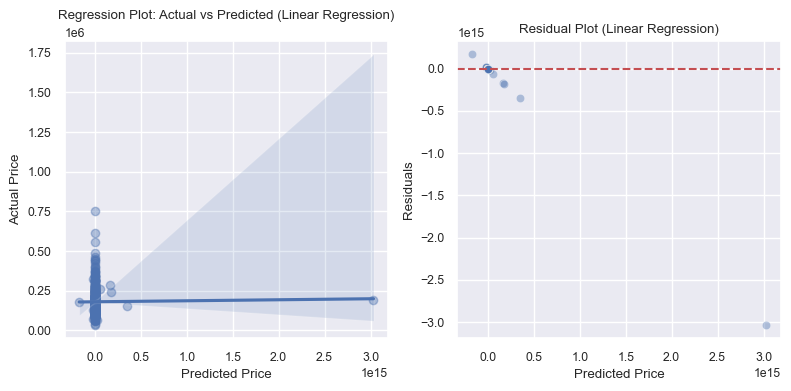

Lasso Regression:
  MAE: 9635.9263
  MSE: 227724026.8072
  RMSE: 15090.5277
  R2: 0.9674

 Model Performance Visualization


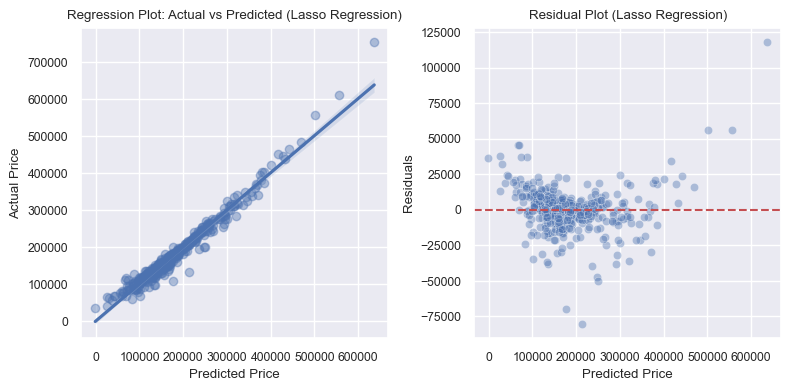

Ridge Regression:
  MAE: 12655.6451
  MSE: 401547469.4104
  RMSE: 20038.6494
  R2: 0.9425

 Model Performance Visualization


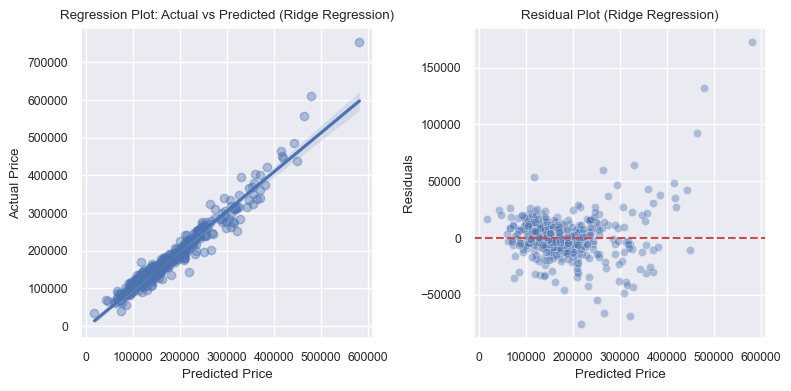

Random Forest:
  MAE: 4767.4170
  MSE: 125590340.2966
  RMSE: 11206.7096
  R2: 0.9820

 Model Performance Visualization


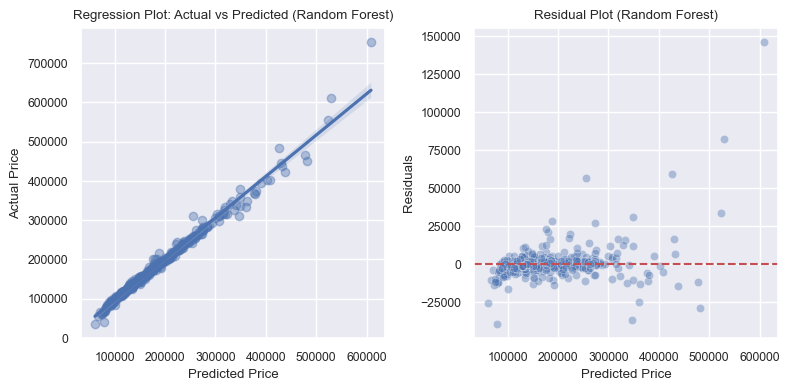

GBM:
  MAE: 4780.3516
  MSE: 58312235.1653
  RMSE: 7636.2448
  R2: 0.9916

 Model Performance Visualization


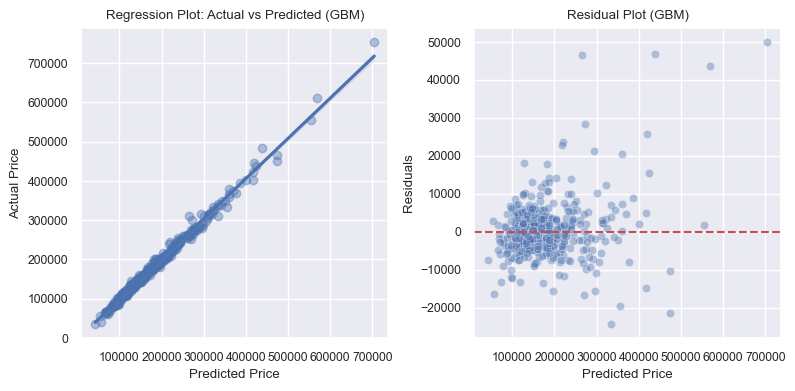

In [303]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for model_name, regressor in models:
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    # Validation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}")

    print('\n Model Performance Visualization')
    plt.figure(figsize=(8, 4))

    # Regression Plot
    plt.subplot(1, 2, 1)
    sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.4})
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title(f'Regression Plot: Actual vs Predicted ({model_name})')
    
    # Residual Plot
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot ({model_name})')
    
    plt.tight_layout()
    plt.show()

 **Cross Validation**

In [307]:
from sklearn.model_selection import cross_validate

print("Cross-Validation Results:")
for model_name, regressor in models:
    scoring = {'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error', 'r2': 'r2'}
    cv_results = cross_validate(regressor, X, y, cv=5, scoring=scoring)
    print(f"\n{model_name}:")
    print(f"  Average MAE: {-cv_results['test_mae'].mean():.4f}")
    print(f"  Average MSE: {-cv_results['test_mse'].mean():.4f}")
    print(f"  Average RMSE: {np.sqrt(-cv_results['test_mse'].mean()):.4f}")
    print(f"  Average R2: {cv_results['test_r2'].mean():.4f}")

Cross-Validation Results:

Linear Regression:
  Average MAE: 34852949075472.7188
  Average MSE: 287256890076185015754655006720.0000
  Average RMSE: 535963515620405.8125
  Average R2: -55369902514354143232.0000

Lasso Regression:
  Average MAE: 9348.6522
  Average MSE: 281469754.9421
  Average RMSE: 16777.0604
  Average R2: 0.9562

Ridge Regression:
  Average MAE: 12322.0492
  Average MSE: 486550004.6734
  Average RMSE: 22057.8785
  Average R2: 0.9244

Random Forest:
  Average MAE: 4470.1548
  Average MSE: 105391919.8404
  Average RMSE: 10266.0567
  Average R2: 0.9839

GBM:
  Average MAE: 4950.1745
  Average MSE: 72882083.3317
  Average RMSE: 8537.1004
  Average R2: 0.9886


 **Hyperparameter Tuning**

In [309]:
# default parameters
print("Default Parameters:")
for model_name, regressor in models:
    print(f'{model_name}')
    print(f'parameters: {regressor.get_params()}', end='\n\n')

Default Parameters:
Linear Regression
parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Lasso Regression
parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}

Ridge Regression
parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}

Random Forest
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

GBM
parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, '

In [311]:
# Define parameter grids for hyperparameter tuning
model_params = [
    ('Linear Regression', LinearRegression(), {
        'fit_intercept': [True, False]
    }),
    ('Lasso Regression', Lasso(), {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False]
    }),
    ('Ridge Regression', Ridge(), {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False]
    }),
    ('Random Forest', RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    ('GBM', GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 5, 7]
    })
]

In [313]:
# Best parameters and scores initialization
best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

print("\nHyperparameter Tuning Results:")
for model_name, regressor, params in model_params:
    regressor_grid = GridSearchCV(regressor, params, cv=5, n_jobs=-1, verbose=1).fit(X, y)
    
    print(f"\nModel: {model_name}")
    print("Best Parameters:", regressor_grid.best_params_)
    print("Best Score:", regressor_grid.best_score_)
    print("\n")
    
    if regressor_grid.best_score_ > best_score:
        best_model_name = model_name
        best_model = regressor
        best_score = regressor_grid.best_score_
        best_params = regressor_grid.best_params_

print("\n\nFinal Inference")
print(f"Model: {best_model_name}")
print("Best Parameters:", best_params)
print("Best Score:", best_score)



Hyperparameter Tuning Results:
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Model: Linear Regression
Best Parameters: {'fit_intercept': False}
Best Score: -2.7646027055360804e+18


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.518e+10, tolerance: 4.484e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.644e+10, tolerance: 4.574e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.737e+10, toler


Model: Lasso Regression
Best Parameters: {'alpha': 10.0, 'fit_intercept': True}
Best Score: 0.96047928705892


Fitting 5 folds for each of 6 candidates, totalling 30 fits

Model: Ridge Regression
Best Parameters: {'alpha': 0.1, 'fit_intercept': False}
Best Score: 0.953509391179615


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Model: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9842592798733832


Fitting 5 folds for each of 54 candidates, totalling 270 fits

Model: GBM
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9902204790870741




Final Inference
Model: GBM
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9902204790870741


In [319]:
best_model

GradientBoostingRegressor(random_state=42)

In [321]:
# Function to find best model parameters
def best_params(model_params, best_model):
    for model_name, regressor, params in model_params:
        if best_model == regressor:
            return params
    return None

In [323]:
# Apply the function
best_model_params = best_params(model_params, best_model)

In [325]:
best_model_params

{'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'subsample': [0.8, 1.0],
 'max_depth': [3, 5, 7]}

In [327]:
# Final GridSearchCV with best model and its parameter grid
regressor_best_grid = GridSearchCV(best_model, best_model_params, cv=5, n_jobs=-1, verbose=1).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [328]:
regressor_best_grid

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             verbose=1)

In [331]:
final_model = GradientBoostingRegressor(**regressor_best_grid.best_params_).fit(X, y)

 **Cross Validation**

In [356]:
print("Best Model Cross-Validation")
scoring = {'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error', 'r2': 'r2'}
cv_results_final = cross_validate(final_model, X, y, cv=5, scoring=scoring)
print(f"\n{model_name}:")
print(f"  Average MAE: {-cv_results['test_mae'].mean():.4f}")
print(f"  Average MSE: {-cv_results['test_mse'].mean():.4f}")
print(f"  Average RMSE: {np.sqrt(-cv_results['test_mse'].mean()):.4f}")
print(f"  Average R2: {cv_results['test_r2'].mean():.4f}", end="\n\n")

Best Model Cross-Validation

GBM:
  Average MAE: 4950.1745
  Average MSE: 72882083.3317
  Average RMSE: 8537.1004
  Average R2: 0.9886



#### Feature Importance

In [347]:
# creating function to visualize:

def visualize_importance(model, features, start=0, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    sorted_feature_imp = feature_imp.sort_values("Value", ascending=False)[start:num]
    display(sorted_feature_imp)
    #print(feature_imp.sort_values("Value",ascending=False)[start:num])
    plt.figure(figsize=(12, 12))
    sns.set(font_scale=0.7)
    palette = sns.color_palette("coolwarm", n_colors=num-start)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",ascending=False)[start:num], palette=palette)
    plt.title('Visualization of Important Features')
    plt.tight_layout()
    plt.show()

Value                Feature
41   0.501263                TotalSF
51   0.294601           PricePerSqFt
5    0.159569            OverallQual
55   0.021558           QualityScore
42   0.008758                    Age
7    0.003428              YearBuilt
17   0.002683               2ndFlrSF
46   0.002476           TotalParking
2    0.001089                LotArea
32   0.000579             WoodDeckSF
251  0.000317  FireplaceQu_No Firepl
16   0.000301               1stFlrSF
11   0.000274             BsmtFinSF1
19   0.000258              GrLivArea
31   0.000251             GarageArea
33   0.000241            OpenPorchSF
116  0.000238        Condition2_Norm
15   0.000228             CentralAir
6    0.000194            OverallCond
14   0.000161            TotalBsmtSF
29   0.000119            GarageYrBlt
48   0.000117      YearsSinceRemodel
13   0.000104              BsmtUnfSF
28   0.000096             Fireplaces
52   0.000081         TotalOutdoorSF
309  0.000077        AgeGroup_Mature
49   0.000069             TotalRooms
154  0.000065    Exterior1st_CemntBd
223  0.000062       BsmtFinType2_Unf
50   0.000051               LotRatio
54   0.000042    OverallQualCategory
39   0.000040                 MoSold
8    0.000030           YearRemodAdd
86   0.000027   Neighborhood_Crawfor
0    0.000027             MSSubClass
9    0.000026             MasVnrArea
21   0.000026           BsmtHalfBath
101  0.000024   Neighborhood_Somerst
1    0.000023            LotFrontage
136  0.000020        RoofStyle_Gable
236  0.000019       Electrical_FuseF
282  0.000016              PoolQC_Gd
310  0.000015        AgeGroup_Modern
255  0.000013      GarageType_Attchd
270  0.000012          GarageQual_TA

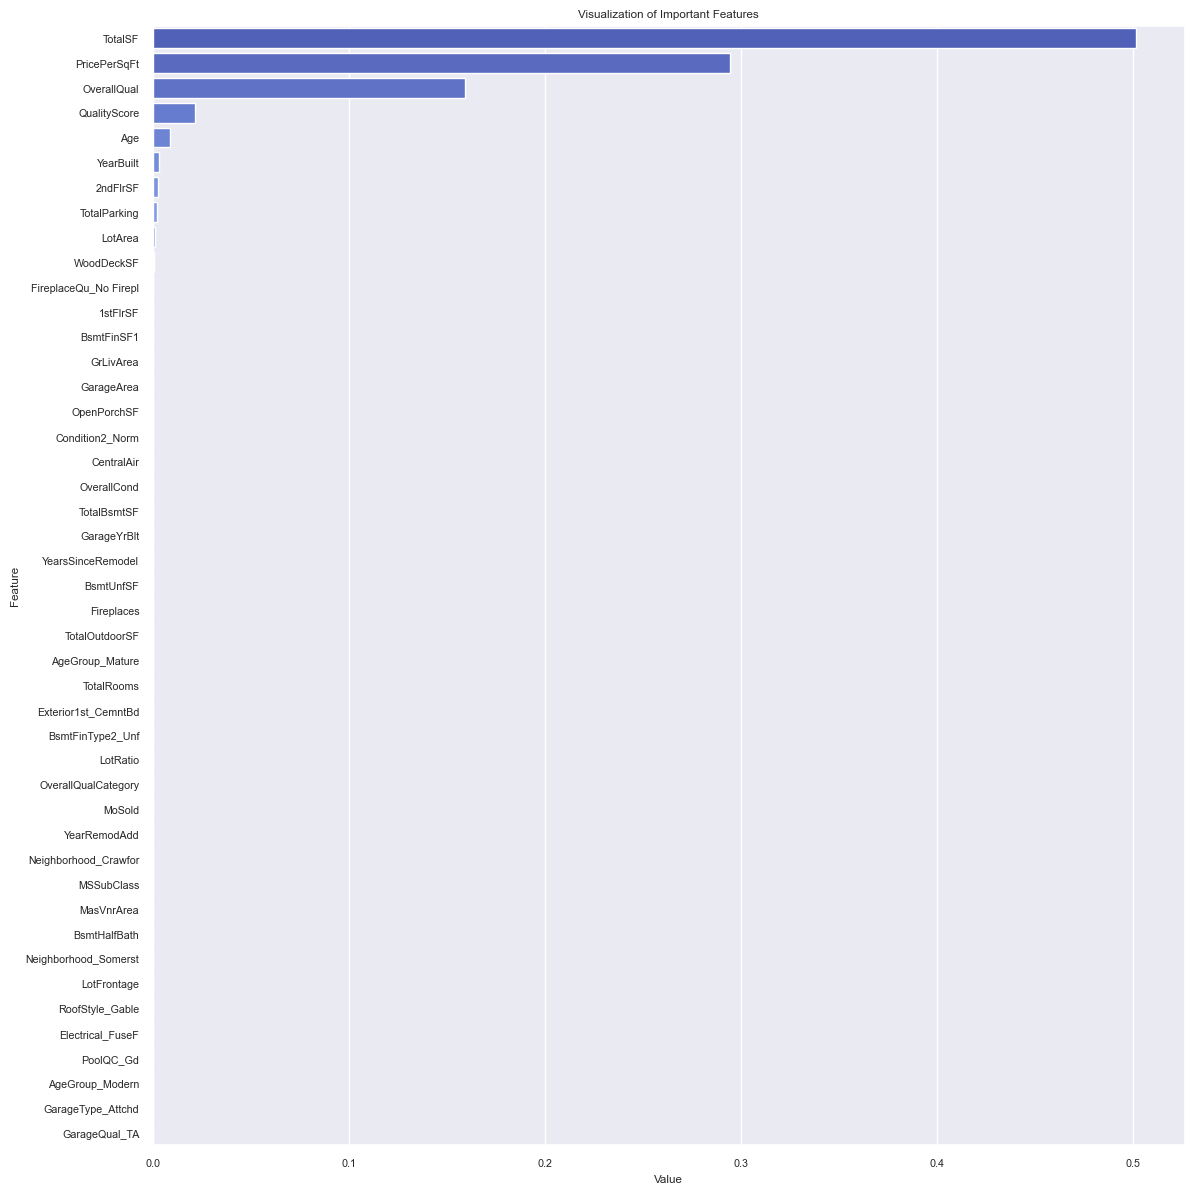

In [349]:
visualize_importance(final_model, X,start=0, num=45)

#### Prediction

In [354]:
predictions = final_model.predict(test_df.drop(['Id'], axis=1))

In [358]:
predictions

array([152911.26147942, 180393.11589184, 175991.05158233, ...,
       180768.38512432, 154631.57191892, 179975.27842011])

In [364]:
test_sample = test_df.drop(['Id'], axis=1).iloc[0].values.reshape(1, -1)
prediction = final_model.predict(test_sample)
print(prediction)

[152911.26147942]


In [375]:
predict_df = test_df.copy()
predict_df = predict_df.drop(['Id'], axis=1)

## Deploying Model with Pickle

In [367]:
import pickle

with open('arko_ml_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved to arko_ml_model.pkl")

Model saved to arko_ml_model.pkl


#### Read from .pkl and predict

In [377]:
# Load model from pickle file
with open('arko_ml_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

result = loaded_model.score(X_test, y_test)
print(result)

print('Predicted SalePrice is : ', loaded_model.predict(predict_df))

0.9991417718709728
Predicted SalePrice is :  [152911.26147942 180393.11589184 175991.05158233 ... 180768.38512432
 154631.57191892 179975.27842011]
